# **Implémentez un modèle de scoring**

Dans le cadre de ce projet, en tant que Data Scientist au sein de l'entreprise Prêt à Dépenser, notre objectif est de développer un modèle de scoring crédit. Cette société propose des crédits à la consommation. Le défi principal consiste à concevoir un modèle de machine learning capable de prédire la probabilité qu'un client rembourse son crédit, permettant ainsi d'accepter ou de refuser les demandes de prêt avec une précision optimisée.

## **Description du jeu de données**

* **application_{train|test}.csv**

Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
Données statiques pour toutes les demandes. Une ligne représente un prêt dans notre échantillon de données.

* **bureau.csv**

Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au Bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).
Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait au bureau de crédit avant la date de la demande.

* **balance_bureau.csv**

Soldes mensuels des crédits antérieurs au Bureau de crédit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au Bureau de crédit - c'est-à-dire que le tableau comporte (nombre de prêts dans l'échantillon *nombre de crédits précédents relatifs* nombre de mois où nous avons un historique observable pour les crédits précédents) lignes.

* **Solde_en_espèces_POS.csv**

Instantanés du solde mensuel des précédents prêts POS (points de vente) et des prêts en espèces que le demandeur avait avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans le domaine du crédit immobilier (crédit à la consommation et prêts en espèces) lié aux prêts de notre échantillon.

* **solde_de_la_carte_de_crédit.csv**

Instantanés du solde mensuel des cartes de crédit précédentes que le demandeur possède auprès de Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans le domaine du crédit immobilier (crédit à la consommation et prêts en espèces) lié aux prêts de notre échantillon.

* **application_precedente.csv**

Toutes les demandes antérieures de prêts immobiliers des clients ayant des prêts dans notre échantillon.
Il y a une ligne pour chaque demande antérieure liée à des prêts dans notre échantillon de données.

* **versements_paiements.csv**

Historique de remboursement des crédits précédemment déboursés en Crédit Immobilier liés aux prêts de notre échantillon.
Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué.
Une ligne équivaut à un paiement d'une mensualité OU à une mensualité correspondant à un paiement d'un crédit immobilier antérieur lié aux prêts de notre échantillon.

* **AccueilCredit_columns_description.csv**
Ce fichier contient des descriptions des colonnes des différents fichiers de données.

**Importer les bibliothèques nécessaires**

In [42]:
pip install numpy pandas scikit-learn

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns


In [44]:
# Afficher toutes les colonnes
pd.options.display.max_columns = None

**Lecture des fichier**

In [45]:
data_train = pd.read_csv('C:\\Users\\Utilisateur\\Documents\\projet 7\\application_train.csv')
data_test = pd.read_csv('C:\\Users\\Utilisateur\\Documents\\projet 7\\application_test.csv')
#data_POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
#data_bureau = pd.read_csv('bureau.csv')
#data_bureau_balance = pd.read_csv('bureau_balance.csv')
#data_credit_card_balance = pd.read_csv('credit_card_balance.csv')
#data_installments_payments = pd.read_csv('installments_payments.csv')
#data_previous_application = pd.read_csv('previous_application.csv')
#data_HomeCredit_columns_description = pd.read_csv('HomeCredit_columns_description.csv', encoding='ISO-8859-1')

# **application_train**

In [46]:
# Affiché les 5 premiere ligne
data_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [47]:
# Affiché les 5 derniere ligne
data_train.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [48]:
# info sur le data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [49]:
# la taille
data_train.shape

(307511, 122)

In [50]:
# le nombre de colonne int et objet
data_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [51]:
# les types de chaque variable
data_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [52]:
# les valeurs manquante
data_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [53]:
pourcentage_manquant = data_train.isnull().mean() * 100
pourcentage_manquant

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

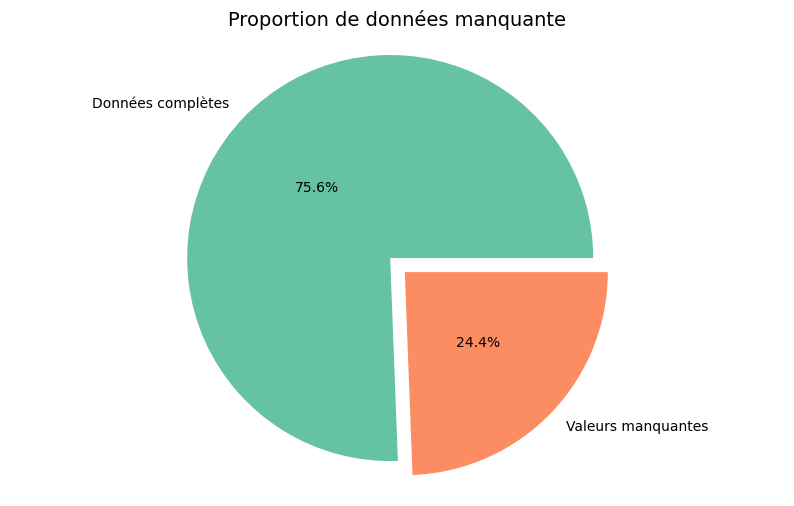

In [54]:
# proportion de donnee manquante
total_manquant = np.prod(data_train.shape)
valeur_manquant = data_train.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1)  # Explosion de la tranche de "Valeurs manquantes"
couleurs = ['#66c2a5', '#fc8d62']  # Couleurs des tranches

# Création du graphique en secteurs
plt.figure(figsize=[10, 6])  # Définition de la taille du graphique
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs)  # Création du graphique en secteurs
plt.title("Proportion de données manquante", fontsize=14)  # Ajout du titre
plt.axis("equal")  # graphique est un cercle
plt.show()  # Affichage du graphique

<Axes: >

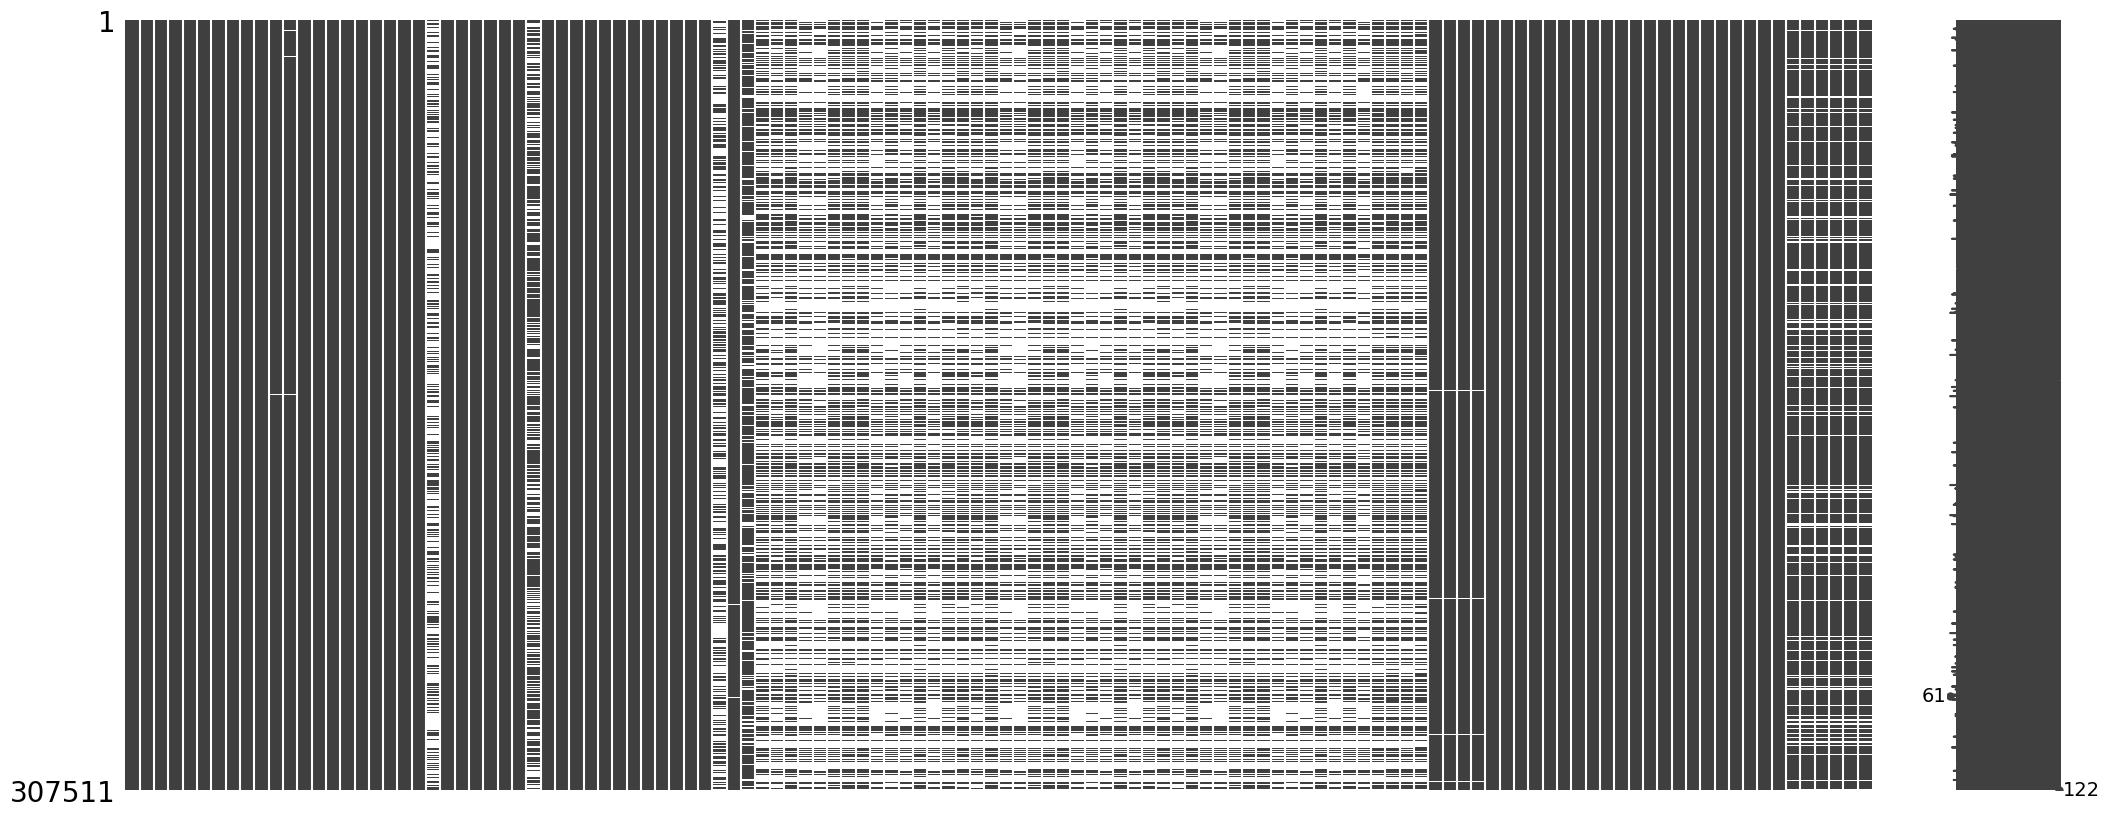

In [55]:
msn.matrix(data_train)

# **application_test**

In [56]:
# Affiché les 5 premiere ligne
data_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [57]:
# Affiché les 5 derniere ligne
data_test.tail()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
48739         270000.0   Unaccompanied               Working   
48740         495000.0   Unaccompanied  Commercial associate   
48741         315000.0   Unaccompanied  Commercial associate   
48742         450000.0          Family  Commercial associate   
48743         270000.0   Unaccompanied               Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
48739  Secondary / secondary special              Widow  House / apartment   
48740  Secondary / secondary special            Married  House / apartment   
48741  Secondary / secondary special            Married  House / apartment   
48742               Higher education            Married  House / apartment   
48743  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
48739                    0.002042      -19970          -5169   
48740                    0.035792      -11186          -1149   
48741                    0.026392      -15922          -3037   
48742                    0.018850      -13968          -2731   
48743                    0.006629      -13962           -633   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
48739            -9094.0            -3399          NaN           1   
48740            -3015.0            -3003          NaN           1   
48741            -2681.0            -1504          4.0           1   
48742            -1461.0            -1364          NaN           1   
48743            -1072.0            -4220         22.0           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
48739               1                1                 1           1   
48740               1                0                 1           0   
48741               1                0                 1           1   
48742               1                1                 1           1   
48743               1                1                 1           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
48739           0             NaN              1.0                     3   
48740           0     Sales staff              4.0                     2   
48741           0             NaN              3.0                     2   
48742           0        Managers              2.0                     2   
48743           0      Core staff              2.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
48739                            3                  WEDNESDAY   
48740                            2                     MONDAY   
48741                            2                  WEDNESDAY   
48742                            2                     MONDAY   
48743                            2                    TUESDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
48739                       16                           0   
48740                       11                           0

In [58]:
# info sur le data
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [59]:
# la taille
data_test.shape

(48744, 121)

In [60]:
# le nombre de colonne int et objet
data_test.dtypes.value_counts()

float64    65
int64      40
object     16
Name: count, dtype: int64

In [61]:
# les types de chaque variable
data_test.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [62]:
# les valeurs manquante
data_test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [63]:
pourcentage_manquant = data_test.isnull().mean() * 100
pourcentage_manquant

SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     12.409732
AMT_REQ_CREDIT_BUREAU_WEEK    12.409732
AMT_REQ_CREDIT_BUREAU_MON     12.409732
AMT_REQ_CREDIT_BUREAU_QRT     12.409732
AMT_REQ_CREDIT_BUREAU_YEAR    12.409732
Length: 121, dtype: float64

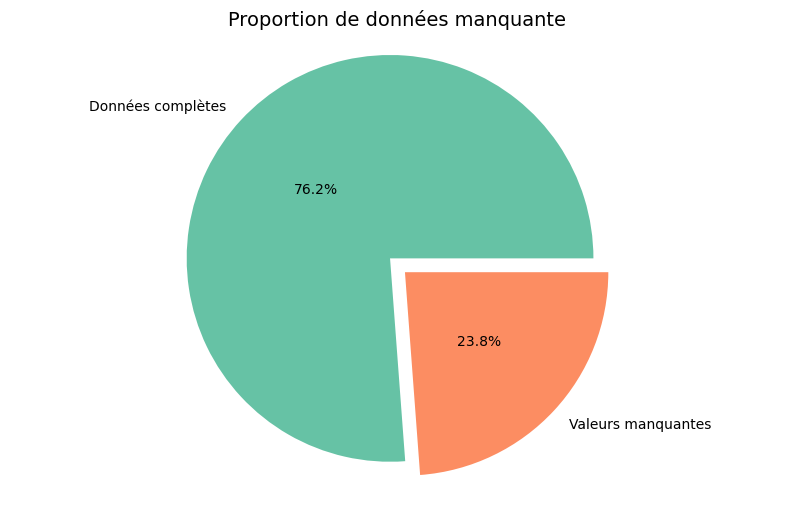

In [64]:
# proportion de donnee manquante
total_manquant = np.prod(data_test.shape)
valeur_manquant = data_test.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1)  # Explosion de la tranche de "Valeurs manquantes"
couleurs = ['#66c2a5', '#fc8d62']  # Couleurs des tranches

# Création du graphique en secteurs
plt.figure(figsize=[10, 6])  # Définition de la taille du graphique
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs)  # Création du graphique en secteurs
plt.title("Proportion de données manquante", fontsize=14)  # Ajout du titre
plt.axis("equal")  # graphique est un cercle
plt.show()  # Affichage du graphique

<Axes: >

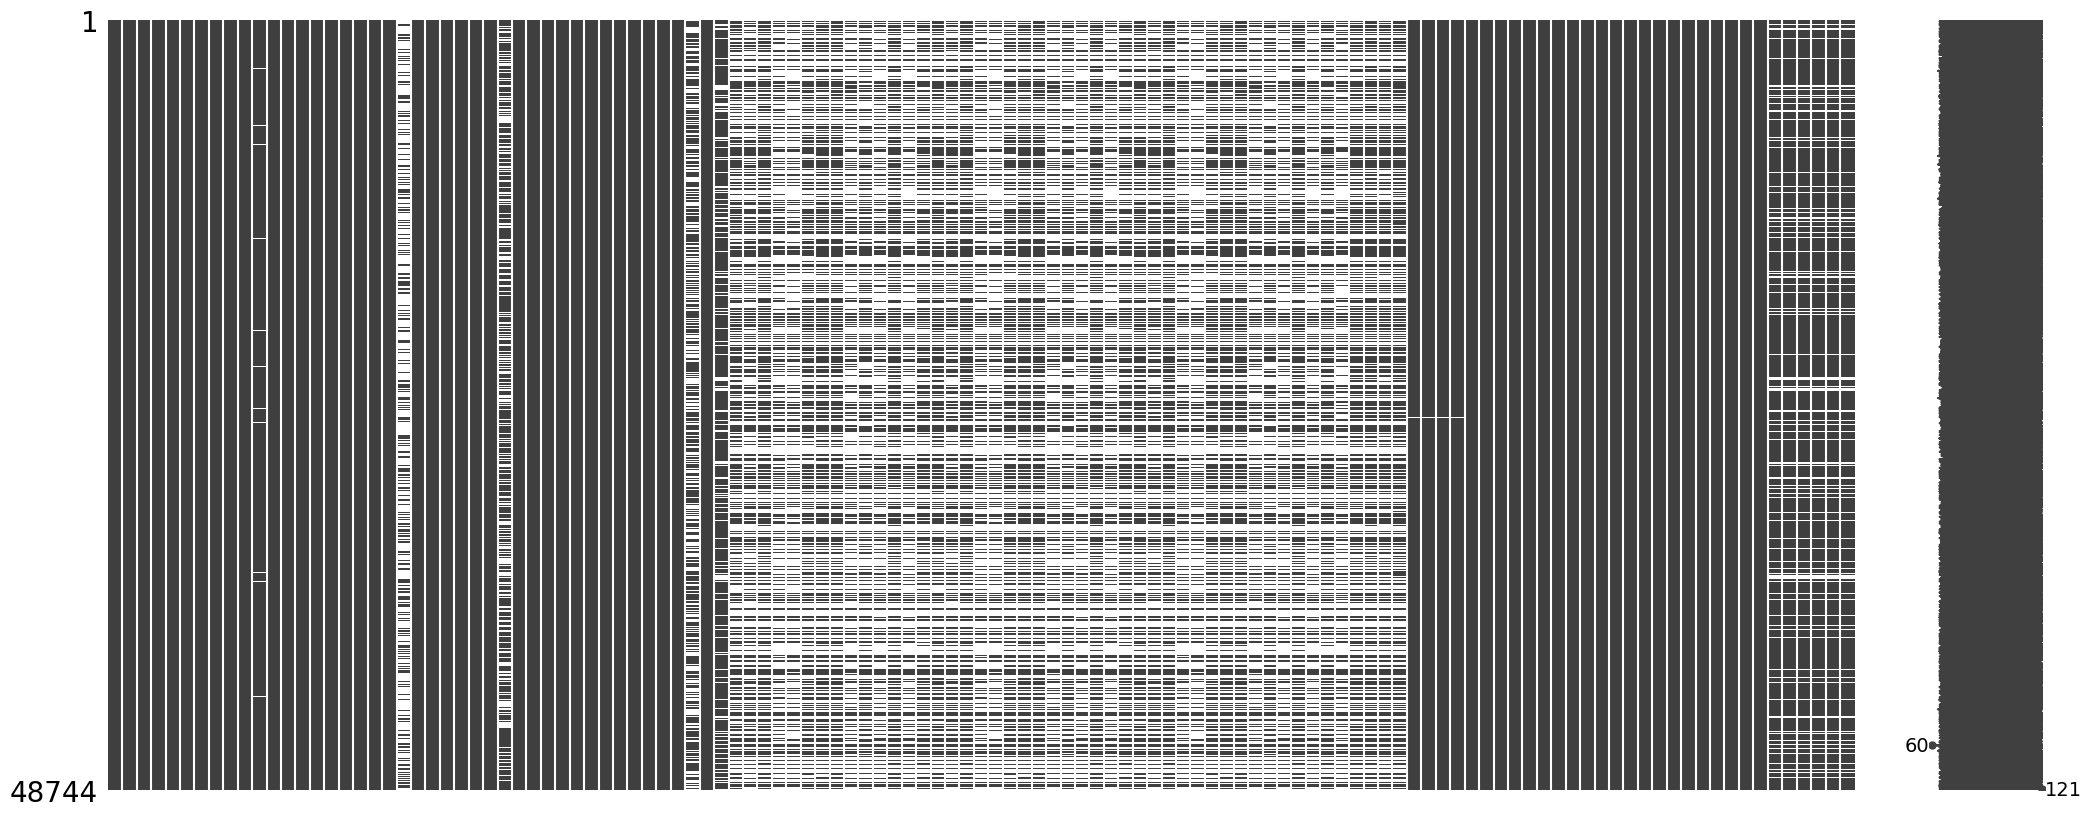

In [65]:
msn.matrix(data_test)

# **EDA**

**Analyse des target**

* **0 :** Le prêt a été remboursé à temps.
* **1 :** Le client a eu des difficultés de paiement.

In [66]:
data_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

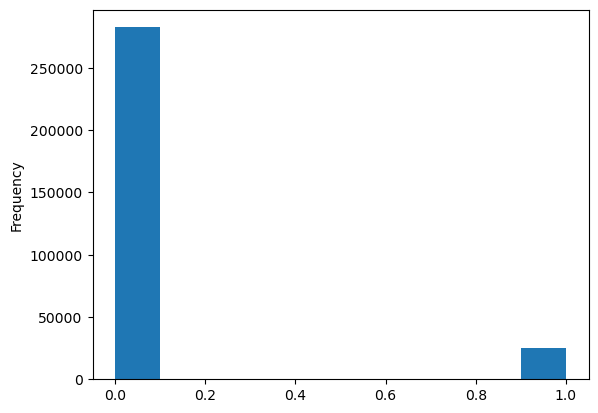

In [67]:
data_train['TARGET'].astype(int).plot.hist();

**analyse des valeurs manquantes**

In [68]:
# Fonction pour calculer les valeurs manquantes par colonne
def missing_values_table(data_train):
    # Nombre total de valeurs manquantes
    mis_val = data_train.isnull().sum()

    # Pourcentage de valeurs manquantes
    mis_val_percent = 100 * data_train.isnull().sum() / len(data_train)

    # Création d'un tableau avec les résultats
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Renommage des colonnes
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Tri du tableau par pourcentage de valeurs manquantes, ordre décroissant
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Affichage d'un résumé
    print("Your selected dataframe has " + str(data_train.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Retourne le tableau des informations de valeurs manquantes
    return mis_val_table_ren_columns

# Appel de la fonction et affichage des 20 premières lignes
missing_values = missing_values_table(data_train)
display(missing_values.head(20))


Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

**Analyse sur les ages**

In [69]:
data_train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [70]:
# Convertir les ages en année
(data_train['DAYS_BIRTH'] / -365).describe()


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9728\1316098023.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_train['DAYS_BIRTH'] / 365, shade=True)


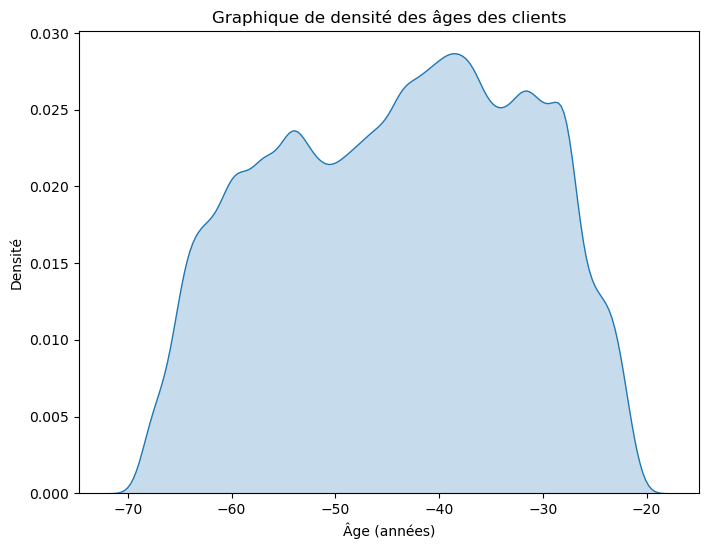

In [71]:
# Afficher un graphique KDE pour la distribution des âges
plt.figure(figsize=(8, 6))
sns.kdeplot(data_train['DAYS_BIRTH'] / 365, shade=True)
plt.title('Graphique de densité des âges des clients')
plt.xlabel('Âge (années)')
plt.ylabel('Densité')
plt.show()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9728\3560510528.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365,
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9728\3560510528.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365,


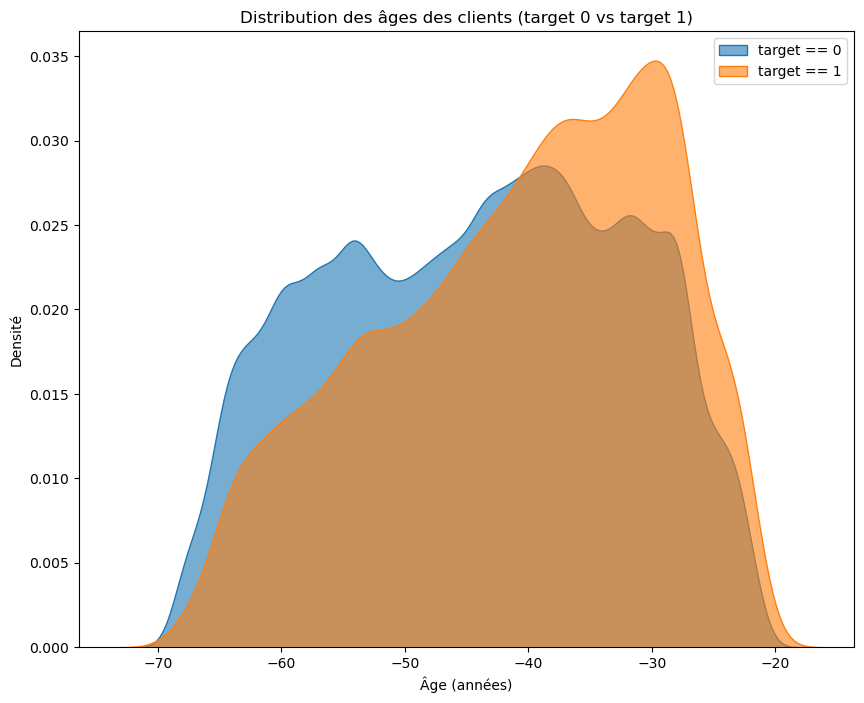

In [72]:
plt.figure(figsize=(10, 8))

# Plot de la densité KDE pour les prêts remboursés à temps
sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365,
            shade=True, label='target == 0', alpha=0.6)

# Plot de la densité KDE pour les prêts non remboursés à temps
sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365,
            shade=True, label='target == 1', alpha=0.6)

# Ajouter des labels et un titre
plt.xlabel('Âge (années)')
plt.ylabel('Densité')
plt.title('Distribution des âges des clients (target 0 vs target 1)')
plt.legend()
plt.show()



*Ces statistiques suggèrent que la majorité des clients sont dans une tranche d'âge comprise entre 34 et 54 ans, ce qui correspond à une population active.*

In [73]:
data_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

*La moyenne est de 63 815 jours, soit environ 175 ans, ce qui est anormal pour une durée d'emploi.*

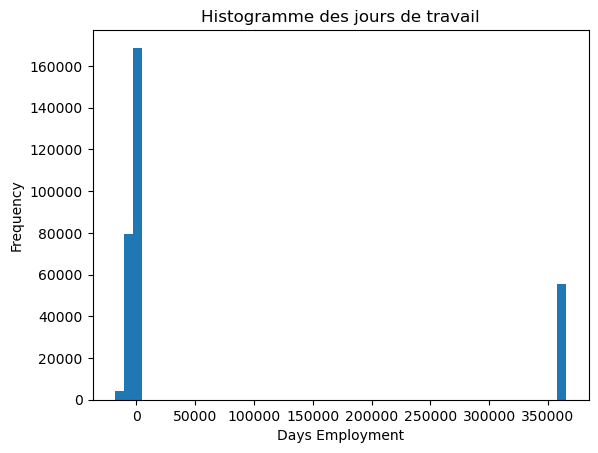

In [74]:
data_train['DAYS_EMPLOYED'].plot.hist(title='Histogramme des jours de travail', bins=50)
plt.xlabel('Days Employment')
plt.ylabel('Frequency')
plt.show()


**la distribution des variables catégorielles**

In [75]:
# Afficher la distribution des variables catégorielles
categorical_cols = data_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    display(data_train[col].value_counts())


NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

FONDKAPREMONT_MODE
reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: count, dtype: int64

HOUSETYPE_MODE
block of flats      150503
specific housing      1499
terraced house        1212
Name: count, dtype: int64

WALLSMATERIAL_MODE
Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: count, dtype: int64

EMERGENCYSTATE_MODE
No     159428
Yes      2328
Name: count, dtype: int64

*les topes 10 des variables categoritielles*

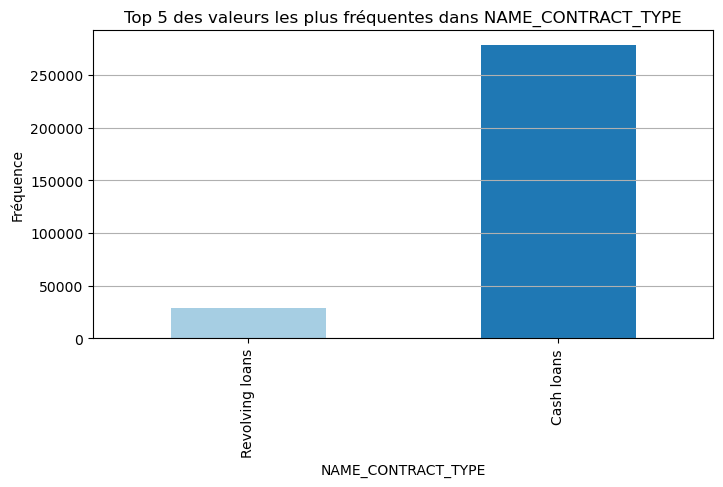

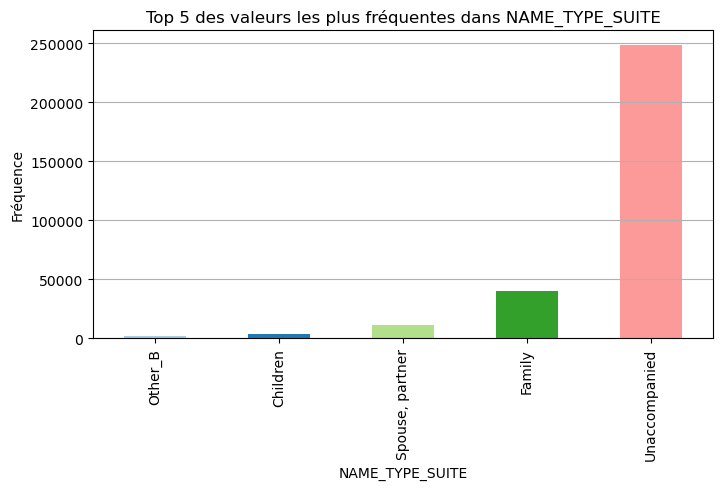

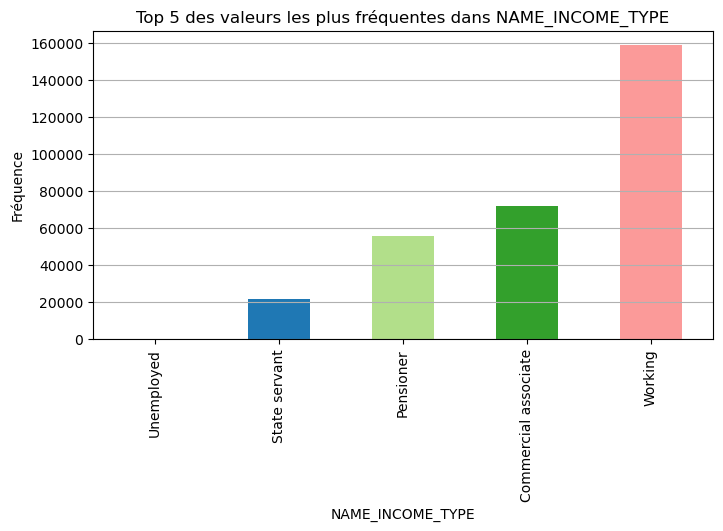

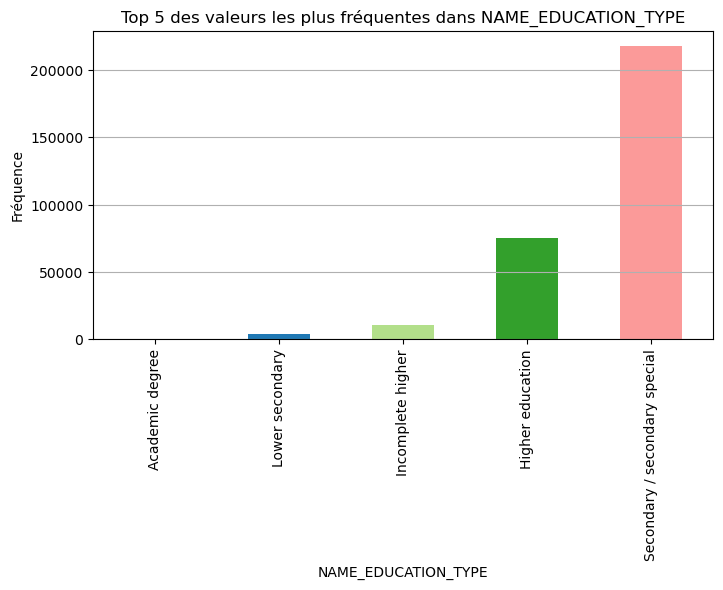

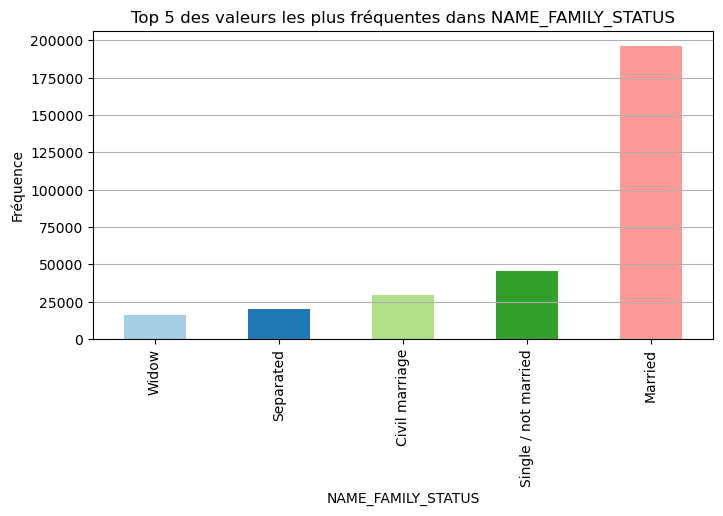

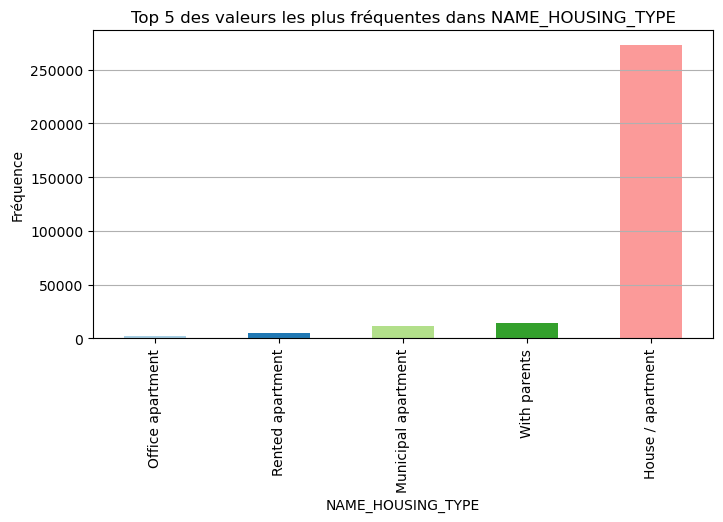

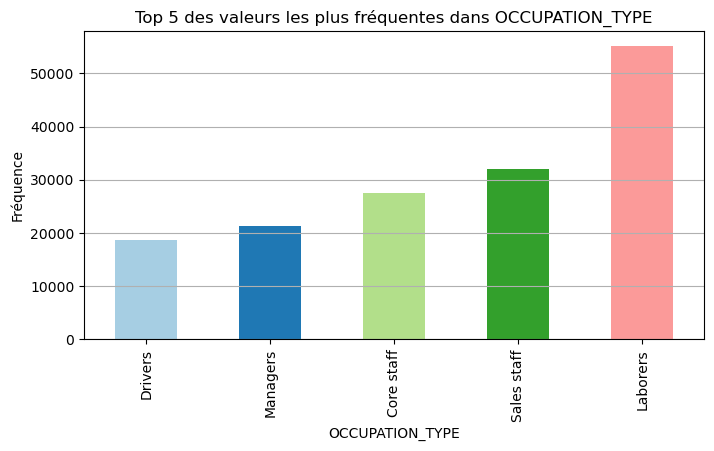

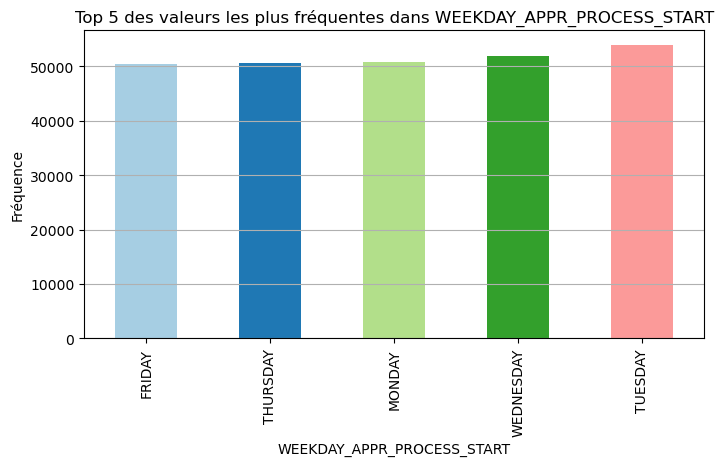

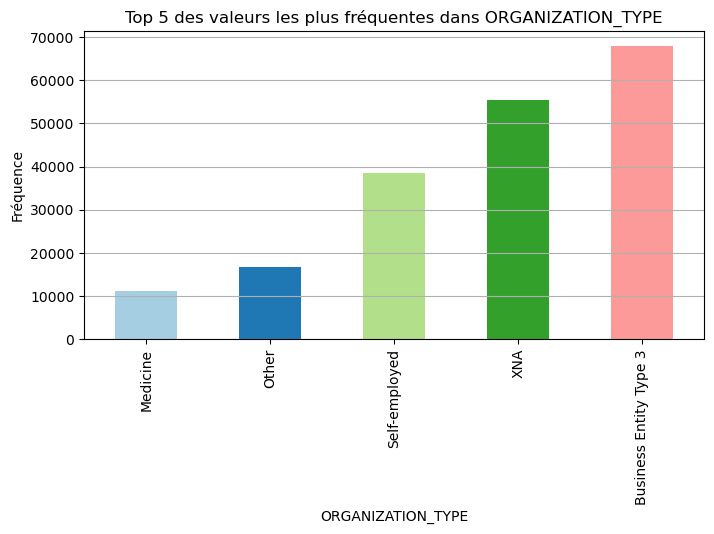

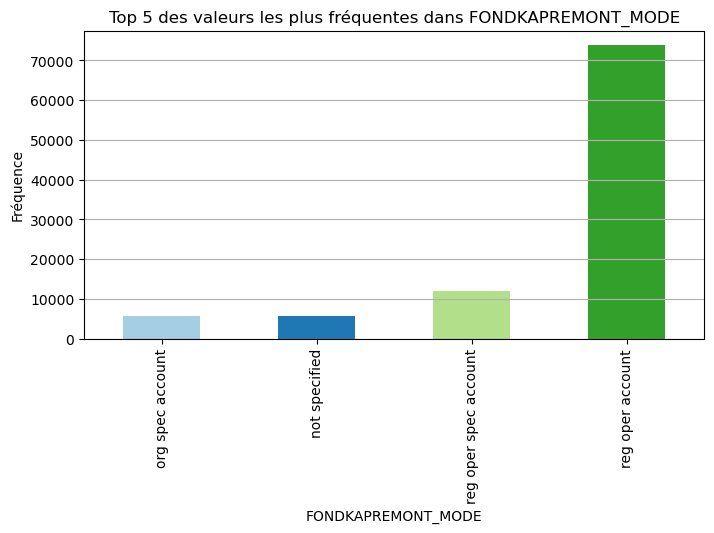

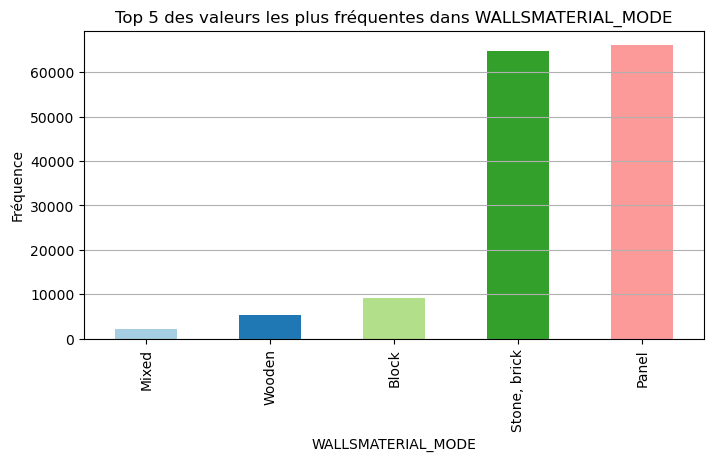

In [76]:
categorical_variables = [
    "NAME_CONTRACT_TYPE", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "WALLSMATERIAL_MODE",
]
# Boucle pour créer un graphique en barres verticales pour chaque variable catégorielle
for var in categorical_variables:
    # Compter les occurrences des valeurs dans la colonne catégorielle
    word_counts = data_train[var].value_counts().head(5)

    # Trier les résultats de façon décroissante
    word_counts = word_counts.sort_values(ascending=True)

    # Générer le graphique en barres verticales
    plt.figure(figsize=(8, 4))
    word_counts.plot(kind='bar', color=plt.cm.Paired(range(len(word_counts))))
    plt.title(f'Top 5 des valeurs les plus fréquentes dans {var}')
    plt.ylabel('Fréquence')
    plt.xlabel(var)
    plt.grid(axis='y')

    # Afficher le graphique
    plt.show()


**Distribution des variables numerique**

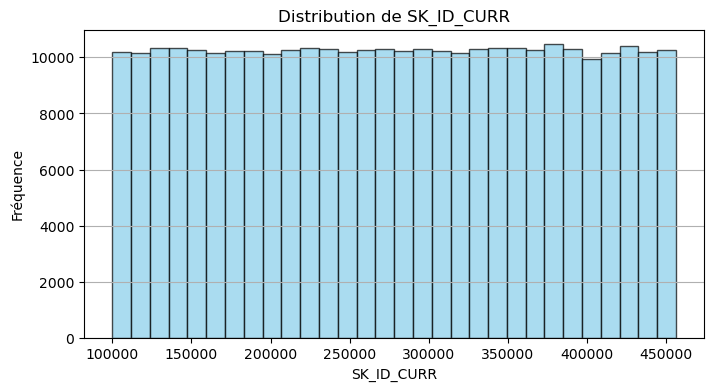

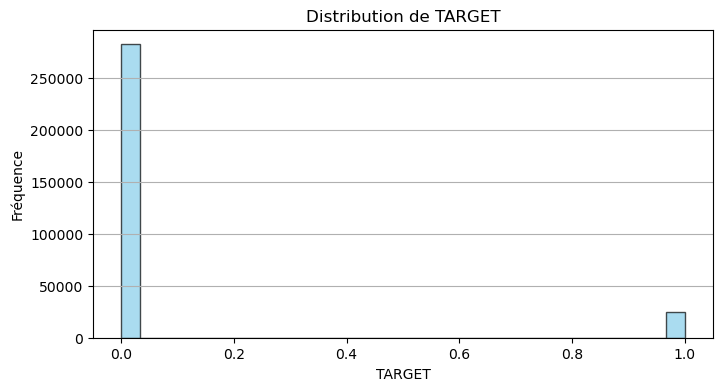

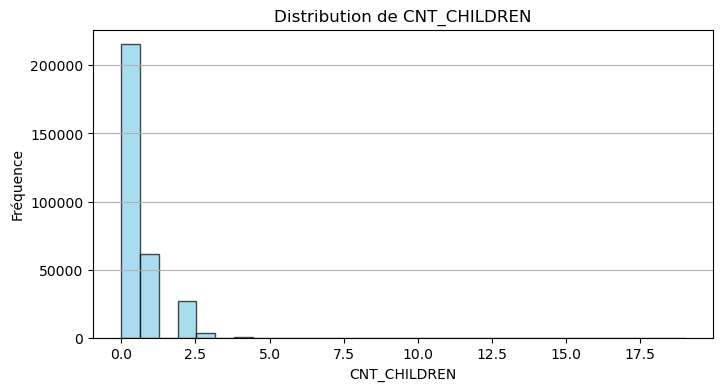

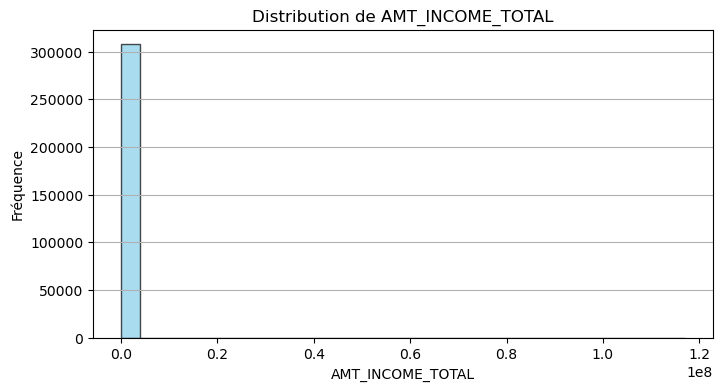

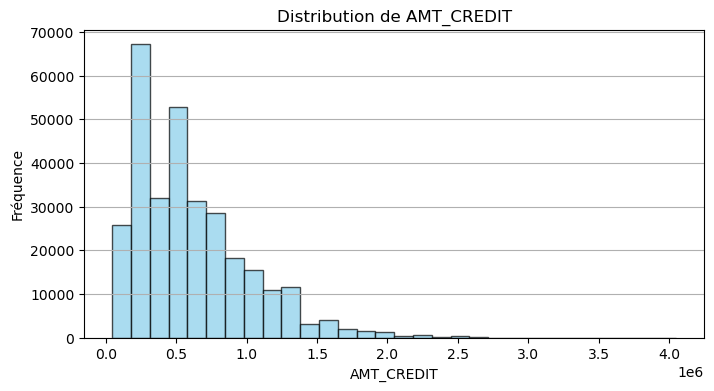

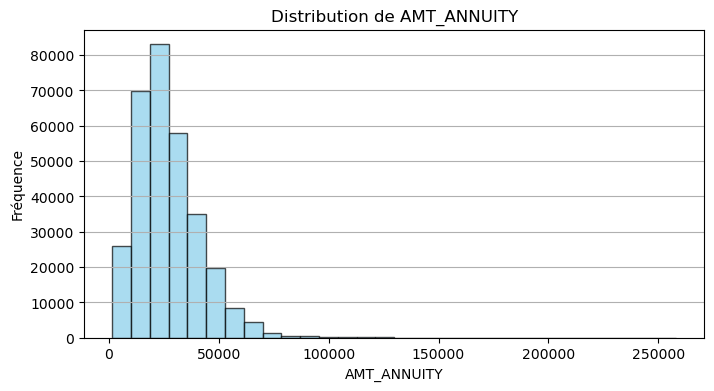

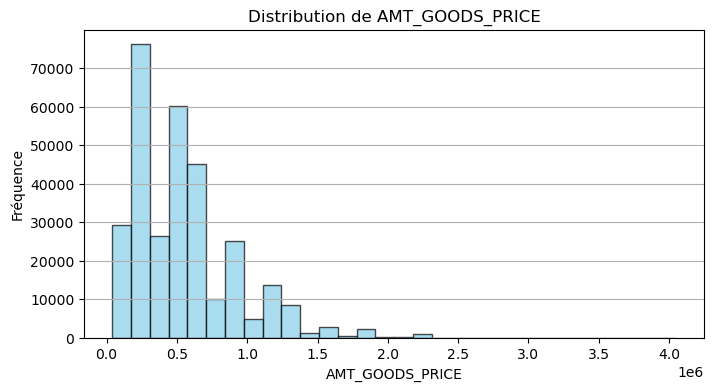

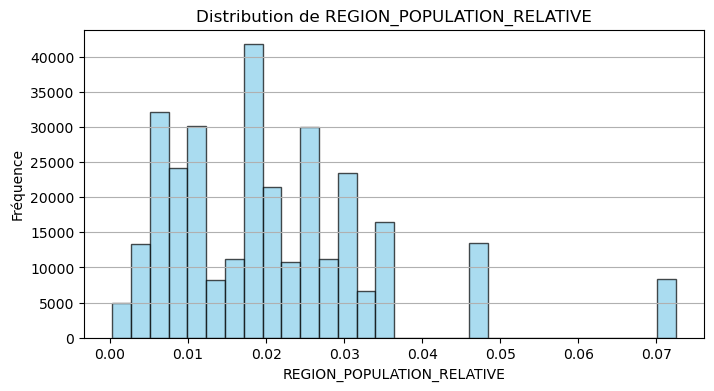

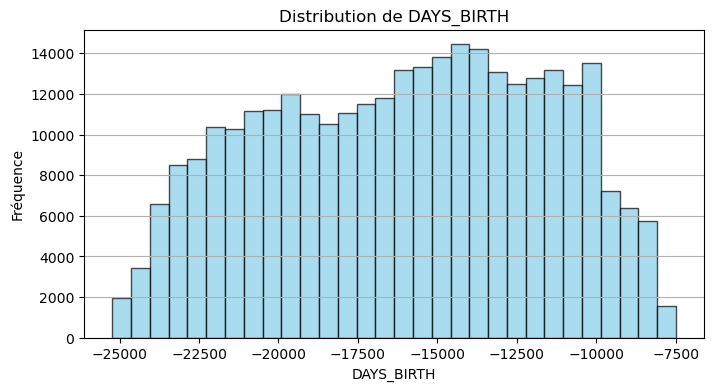

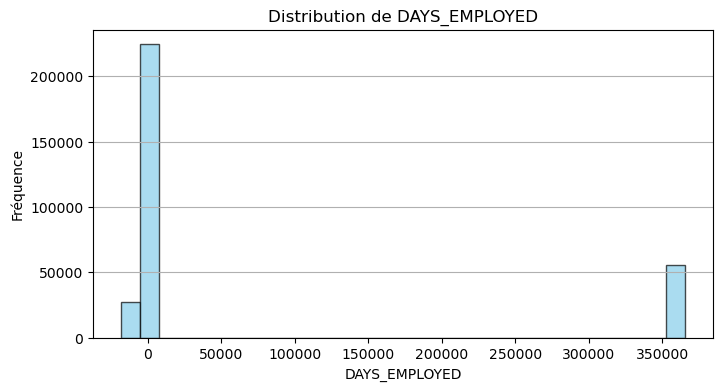

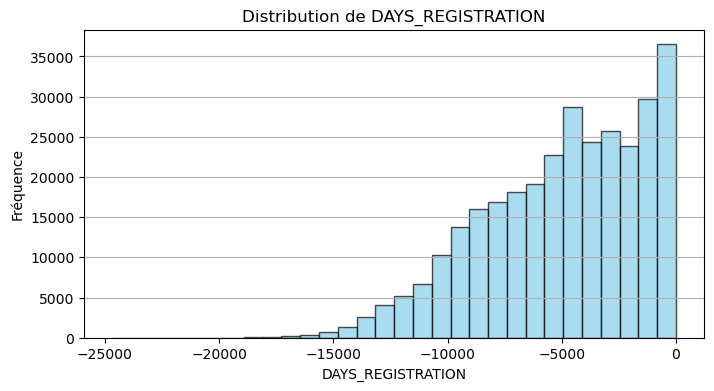

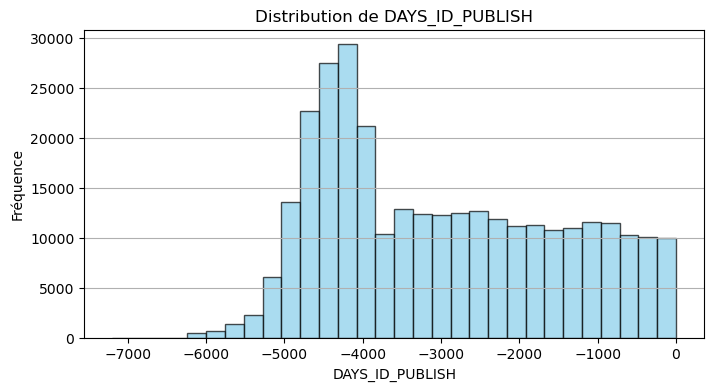

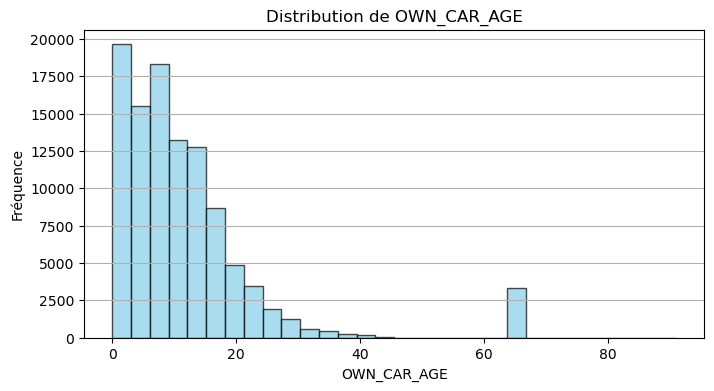

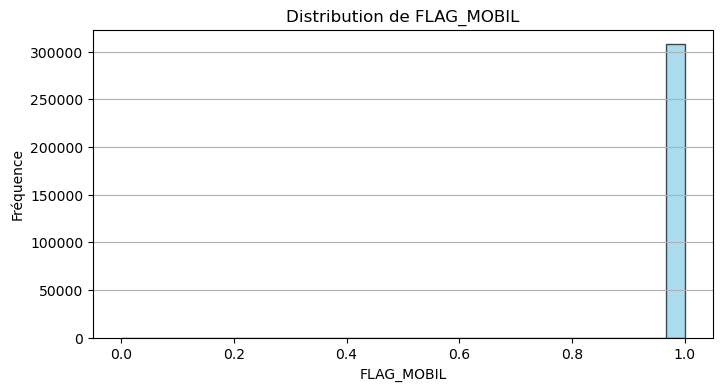

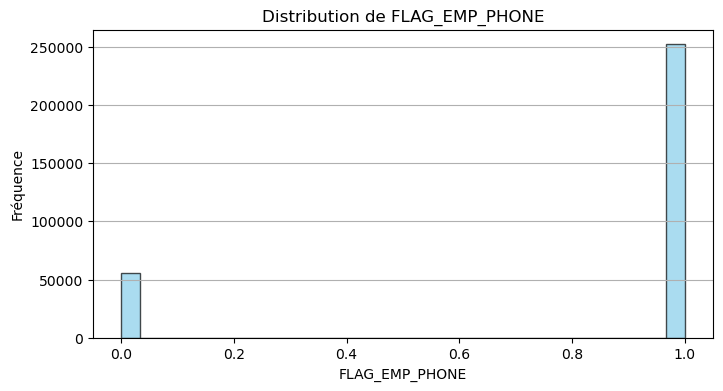

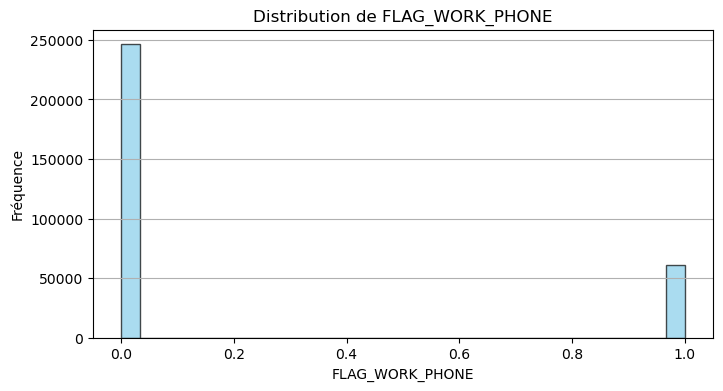

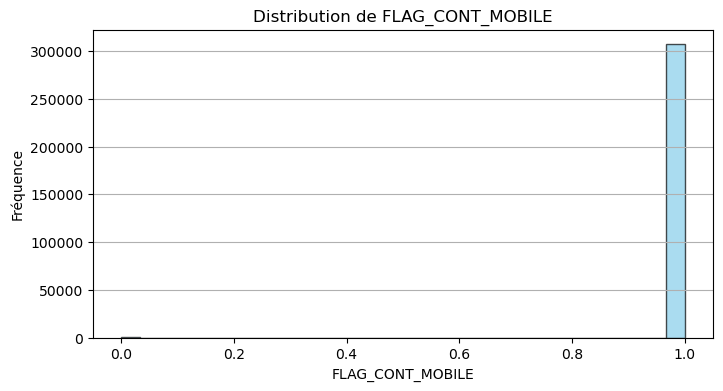

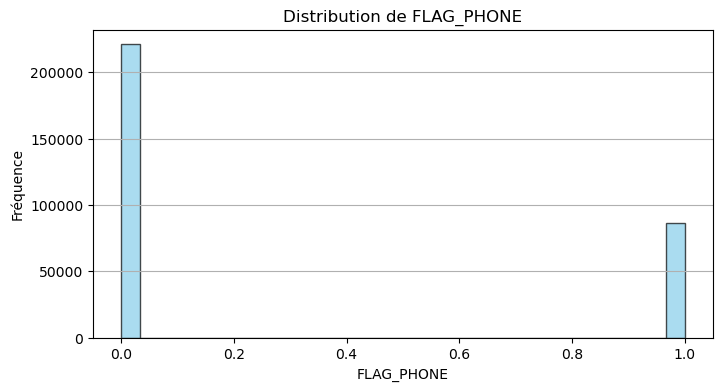

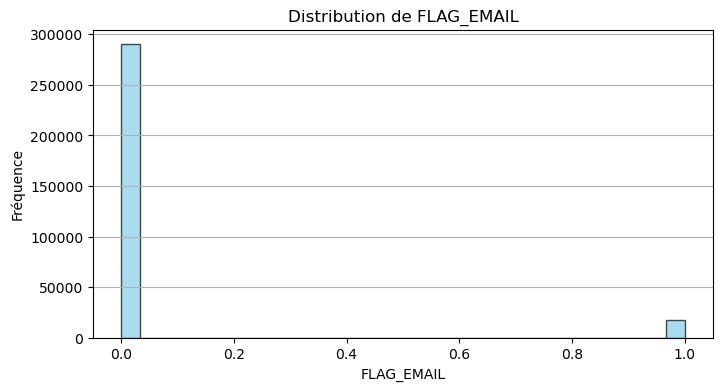

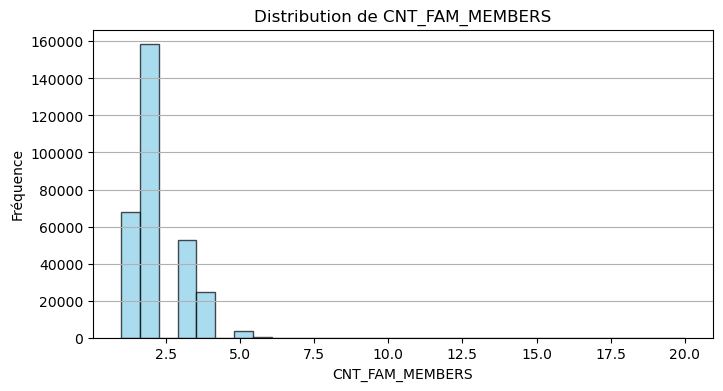

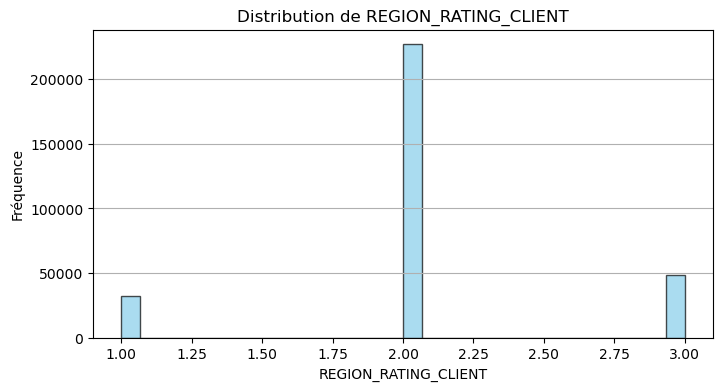

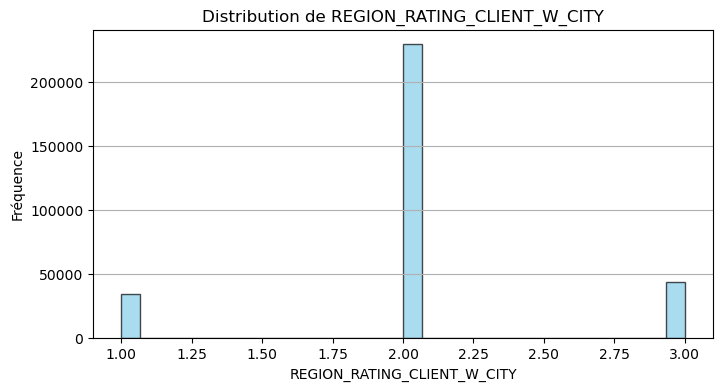

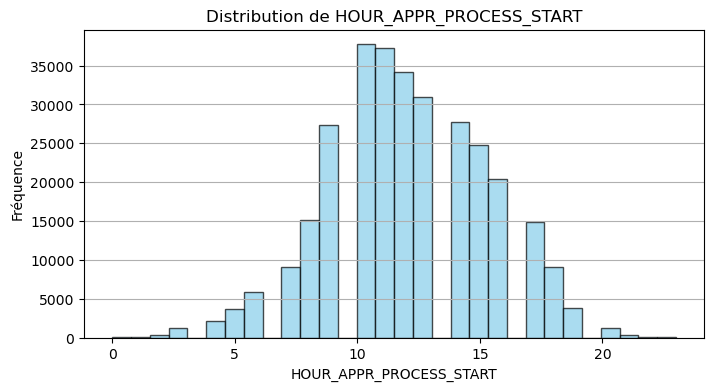

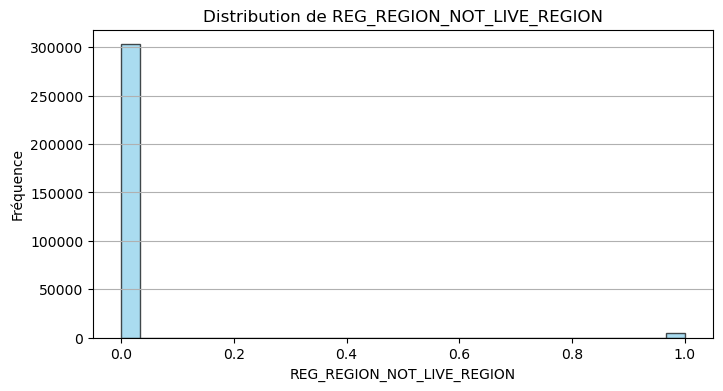

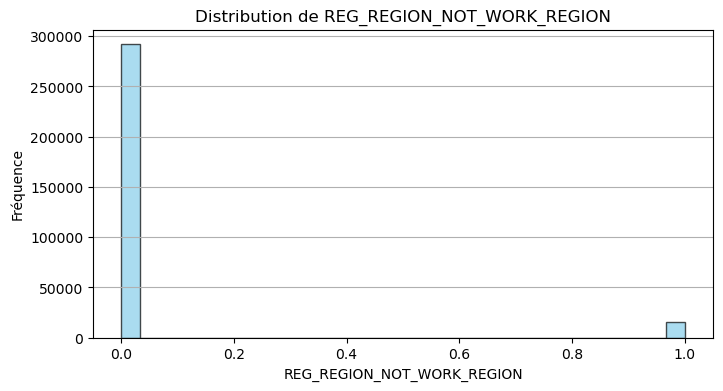

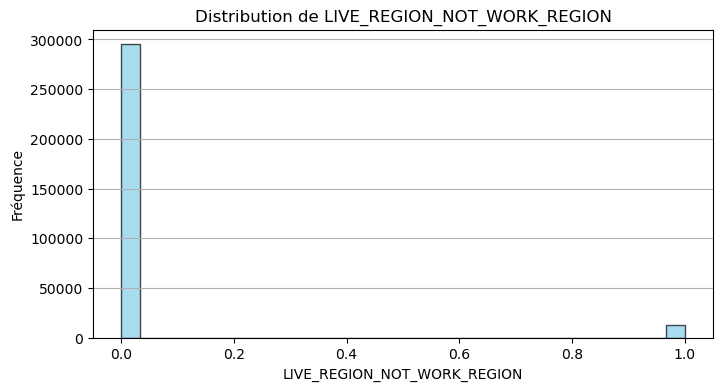

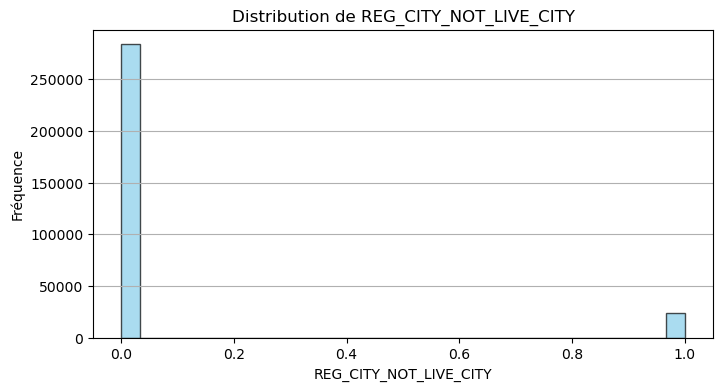

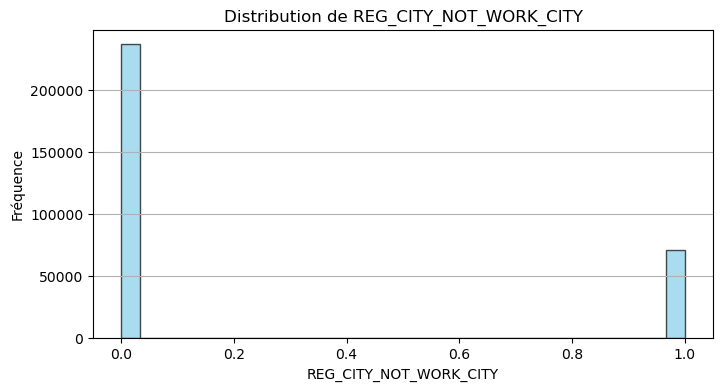

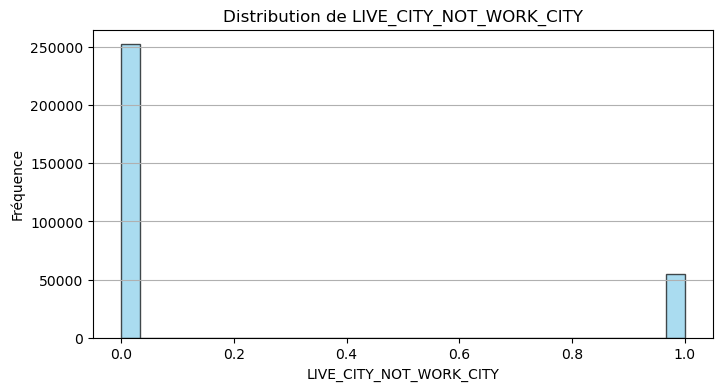

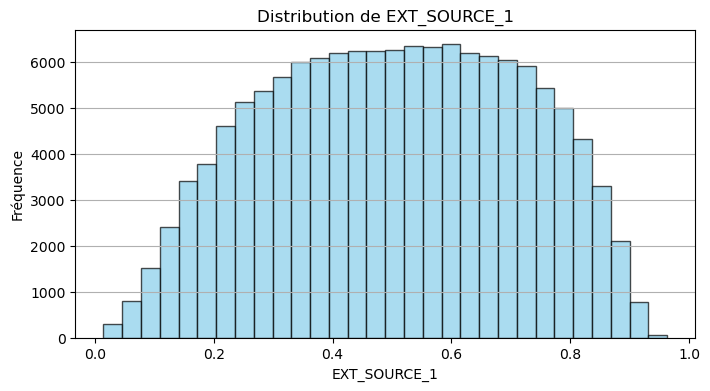

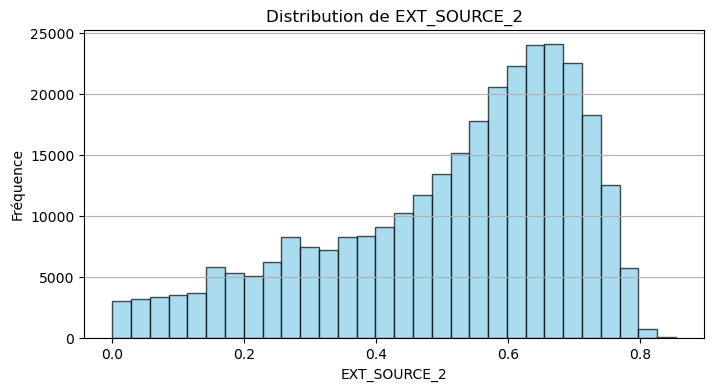

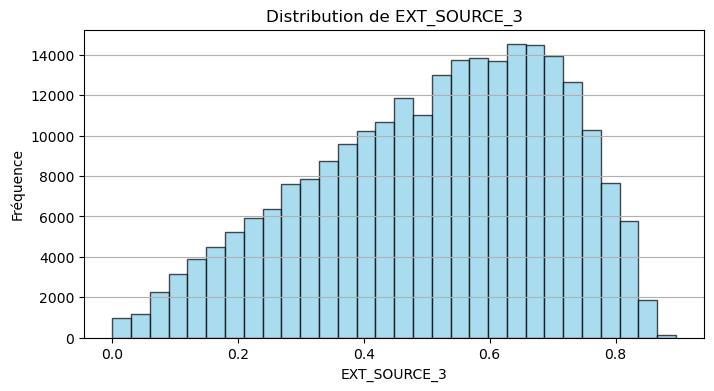

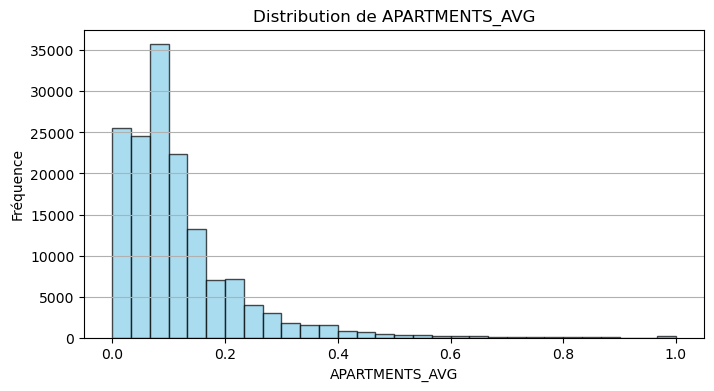

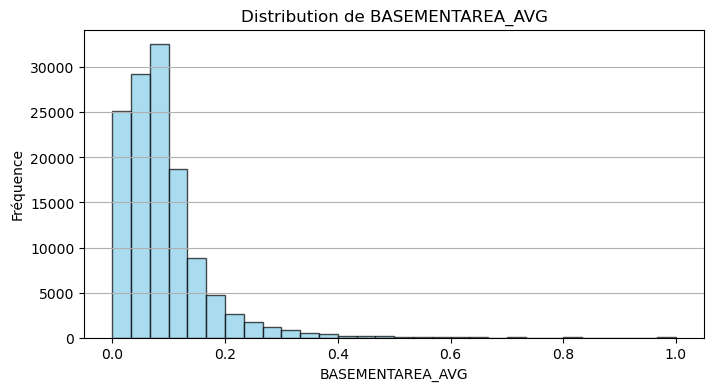

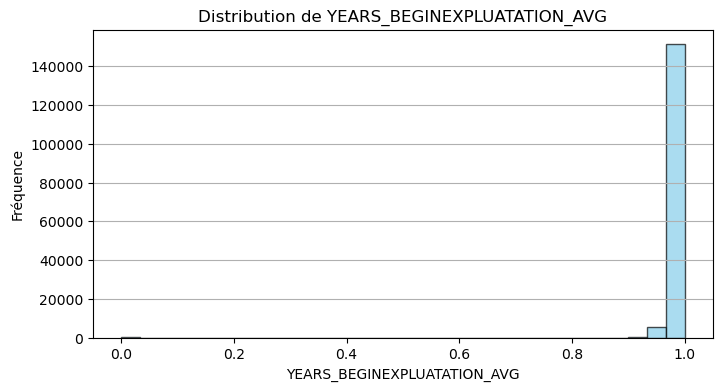

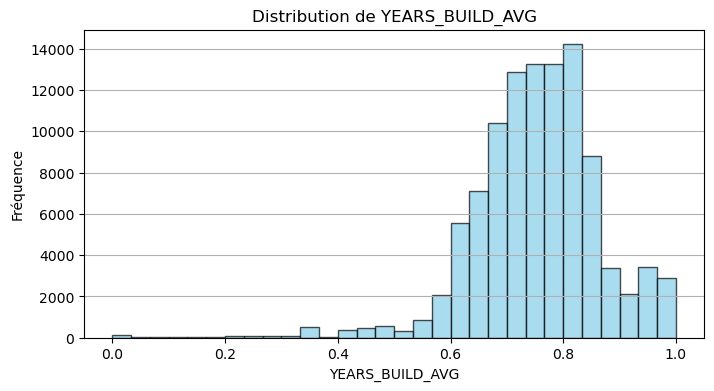

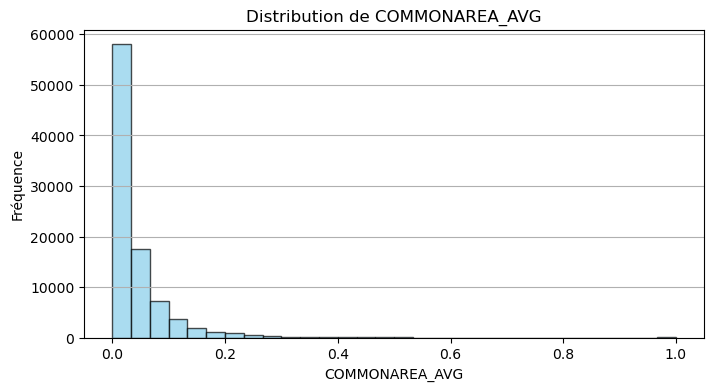

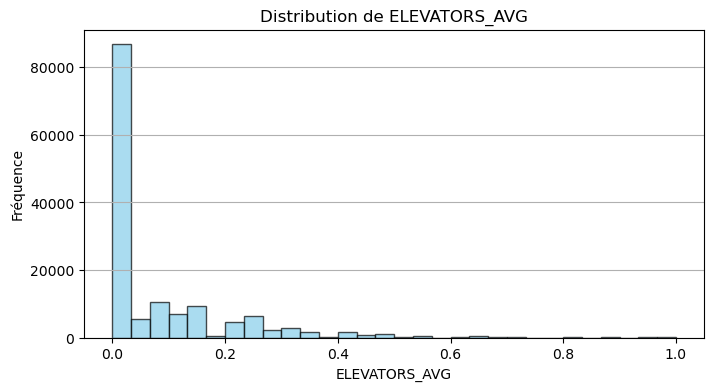

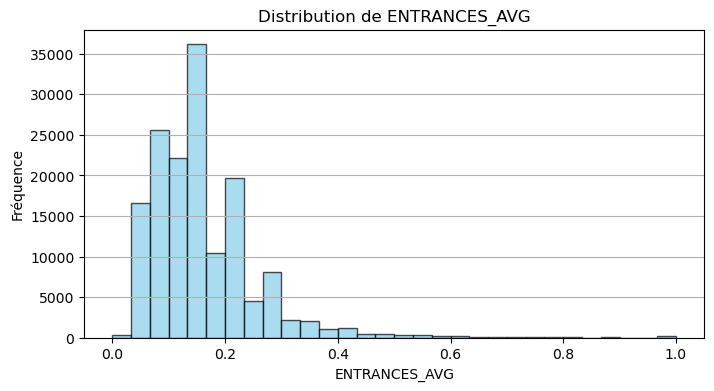

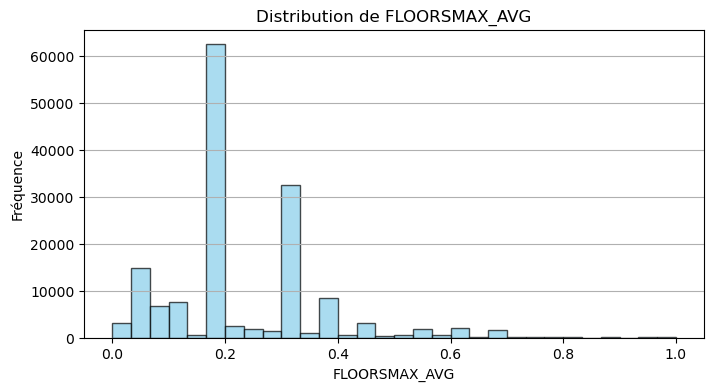

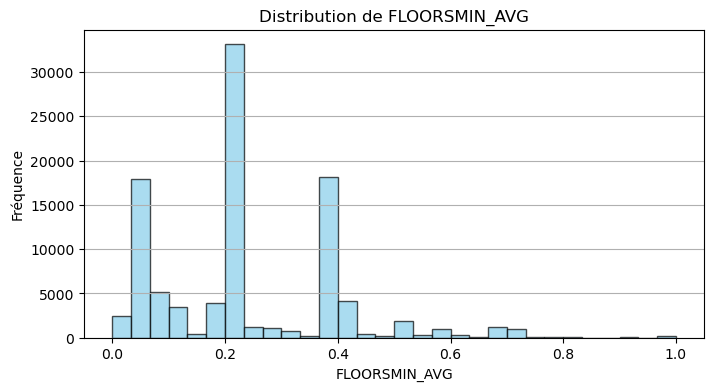

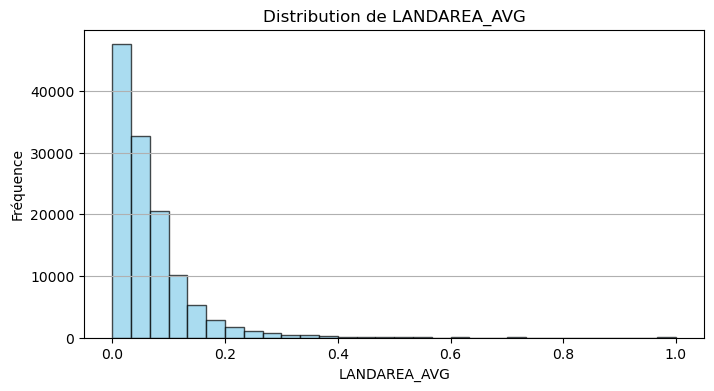

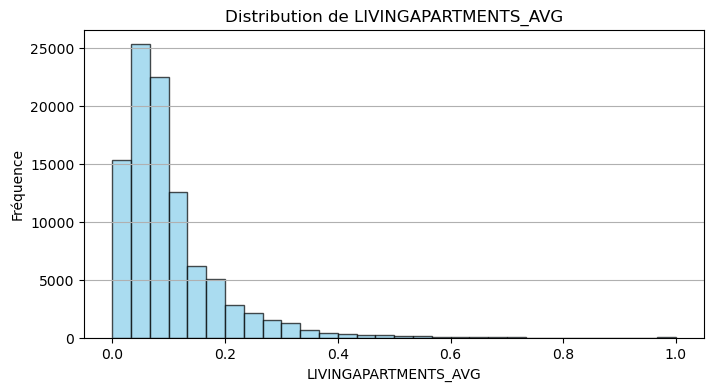

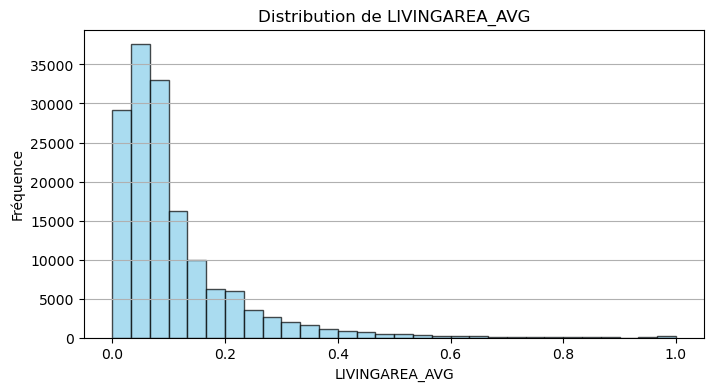

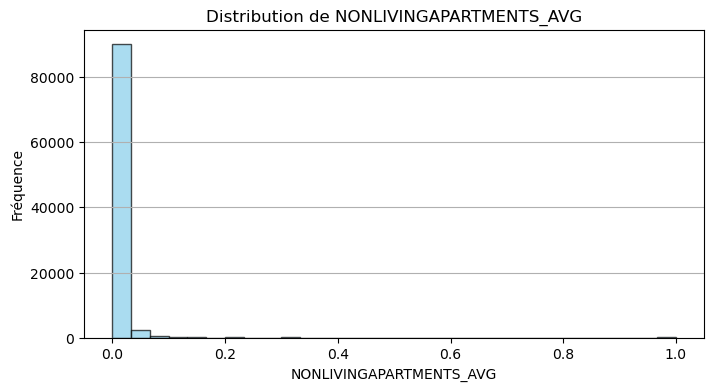

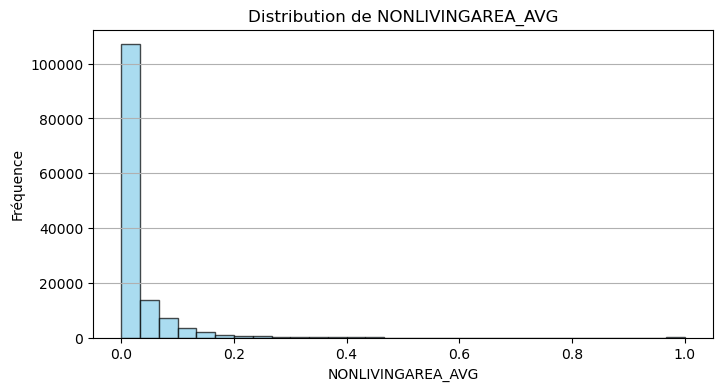

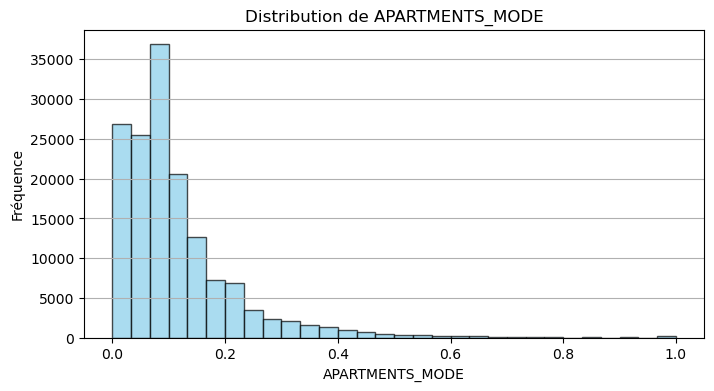

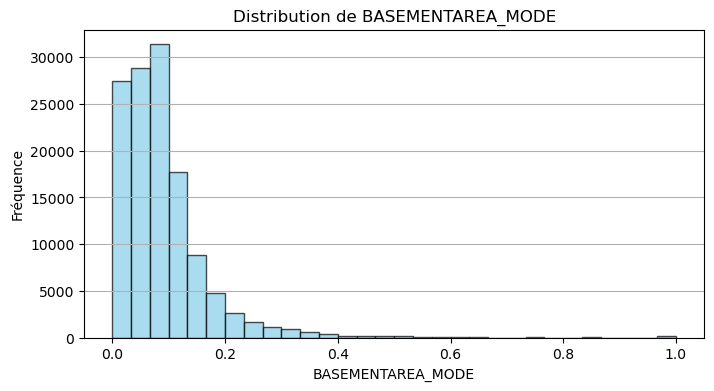

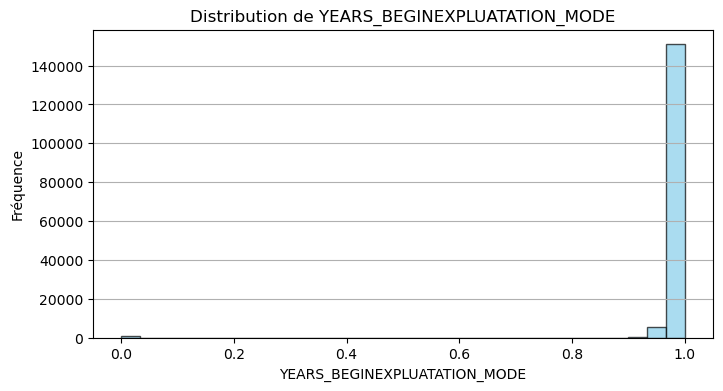

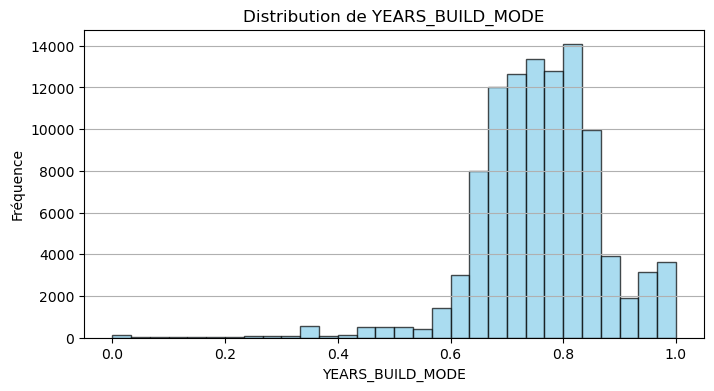

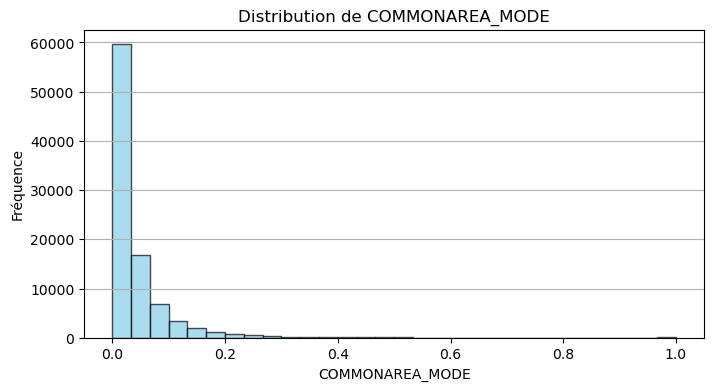

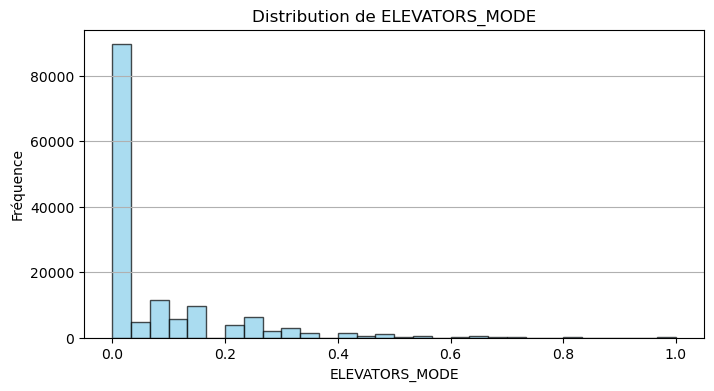

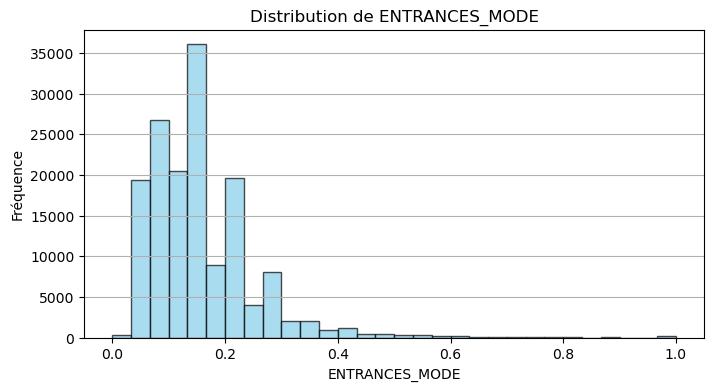

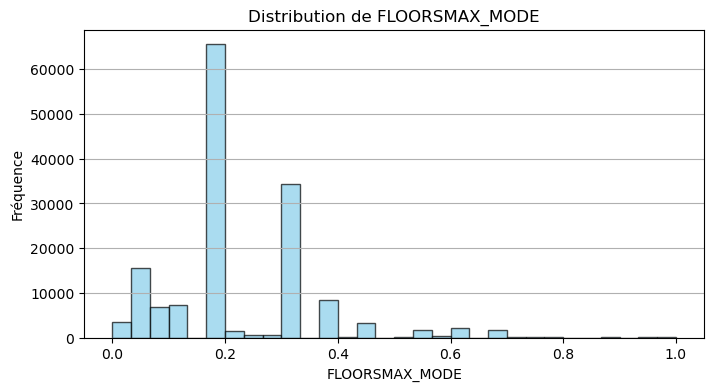

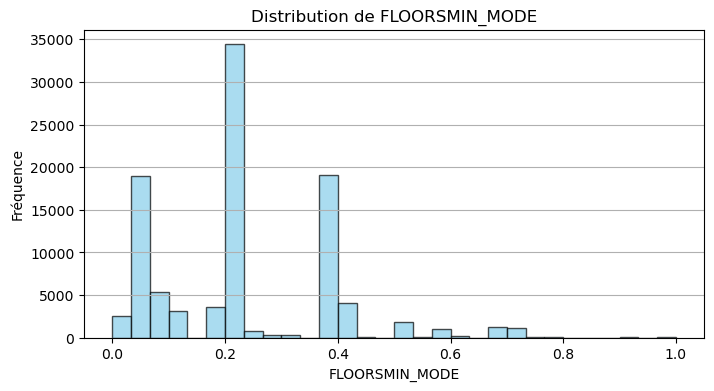

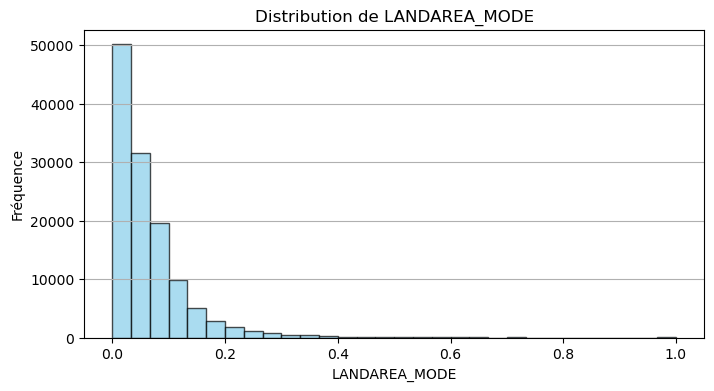

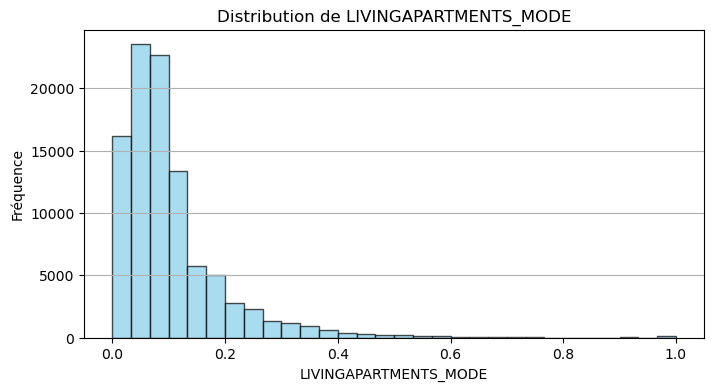

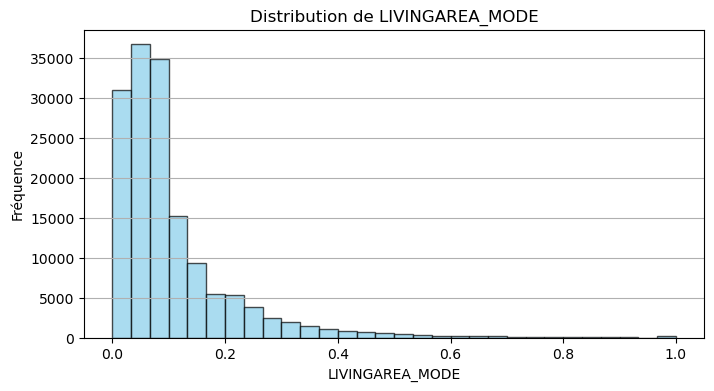

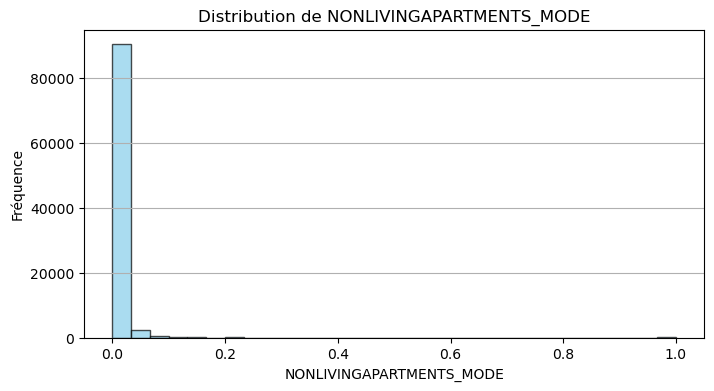

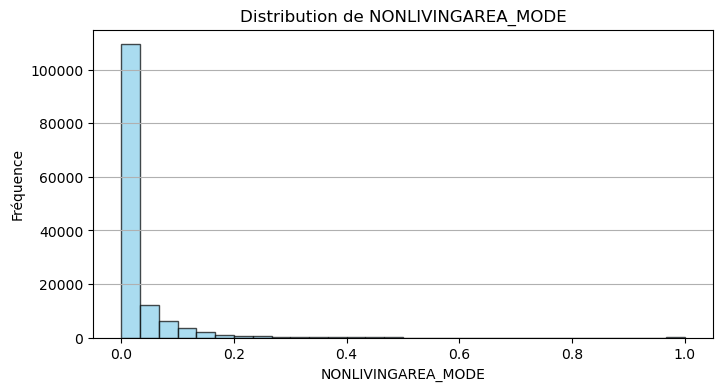

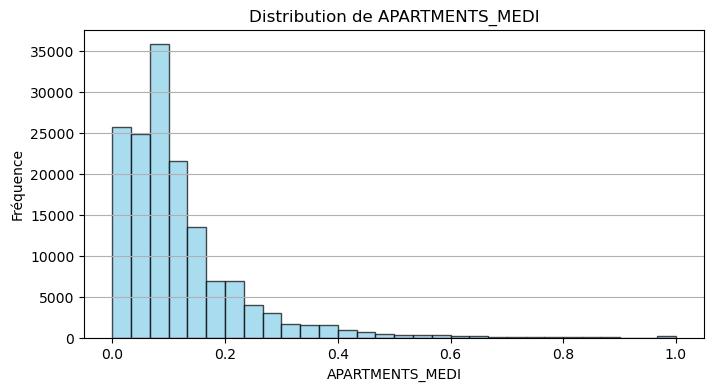

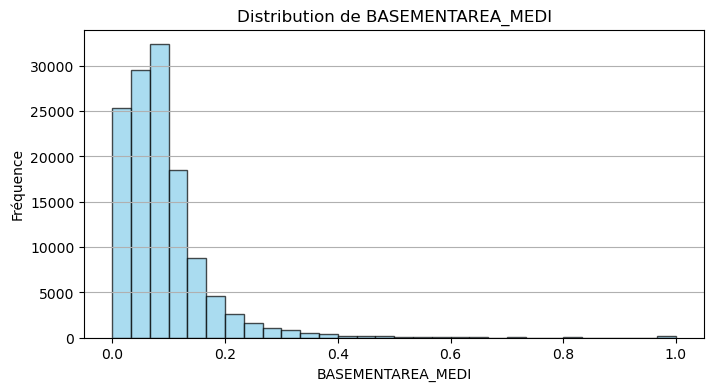

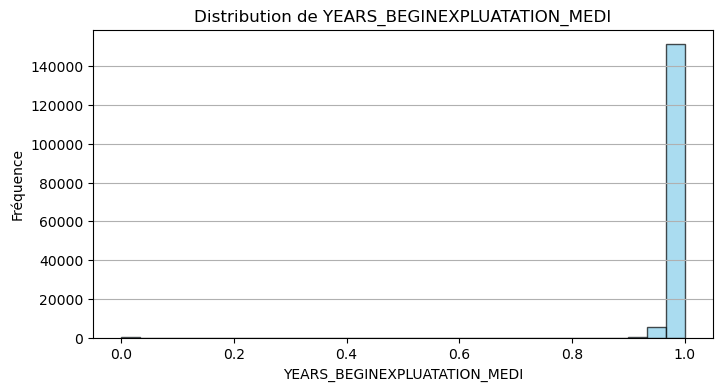

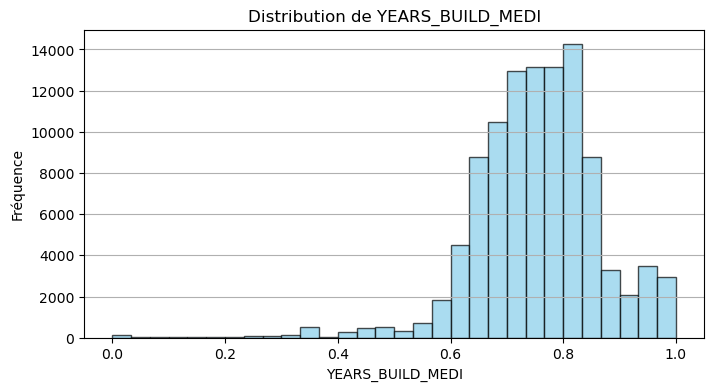

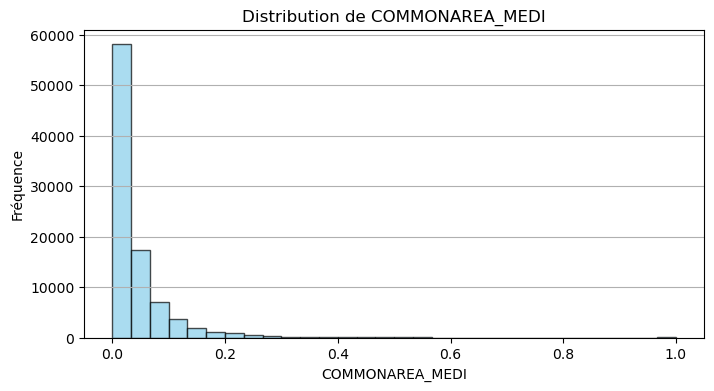

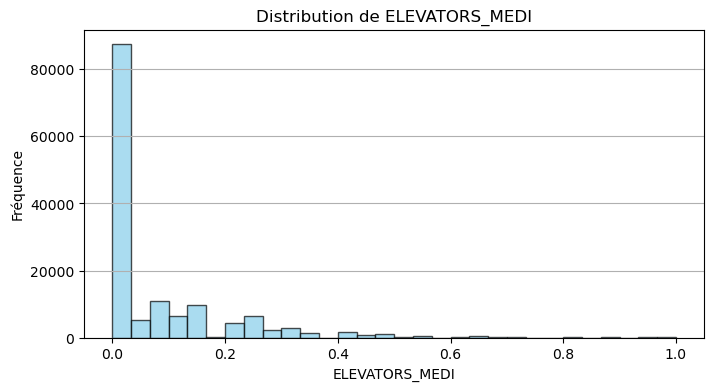

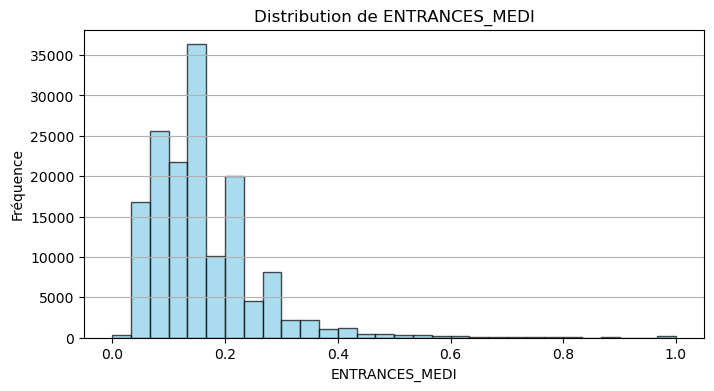

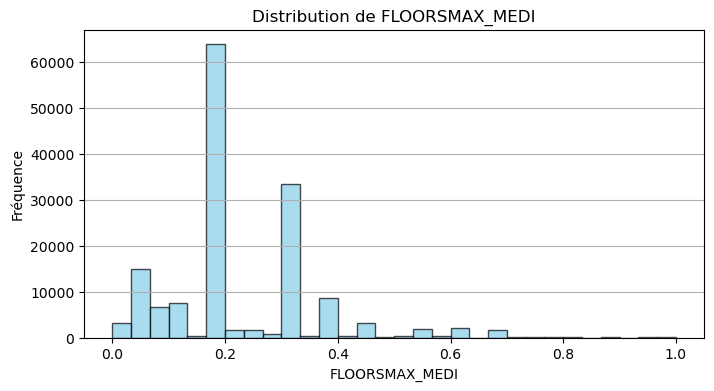

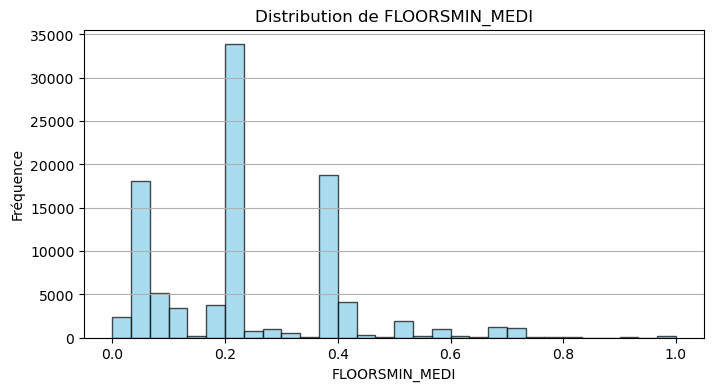

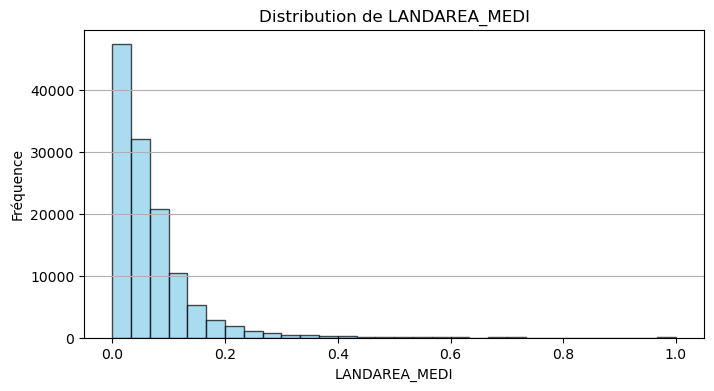

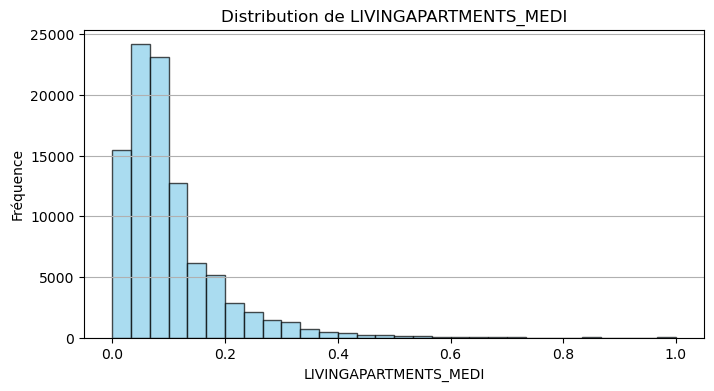

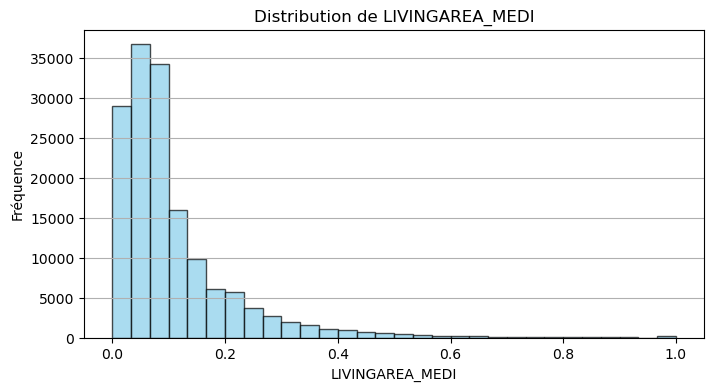

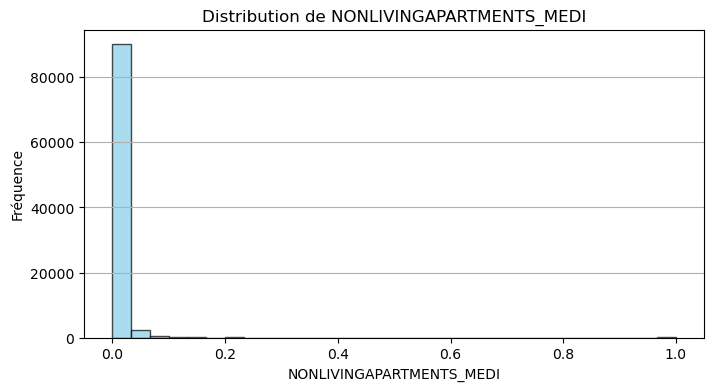

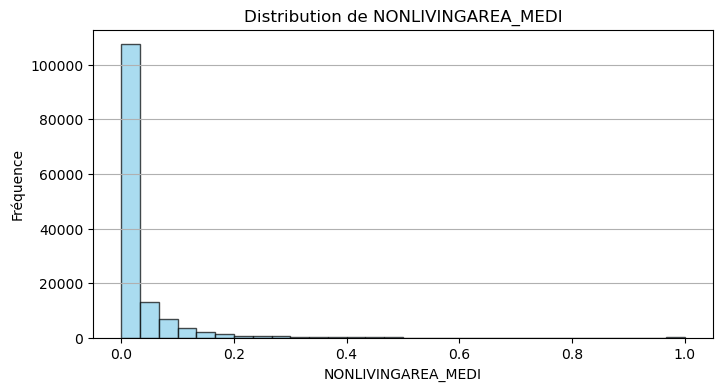

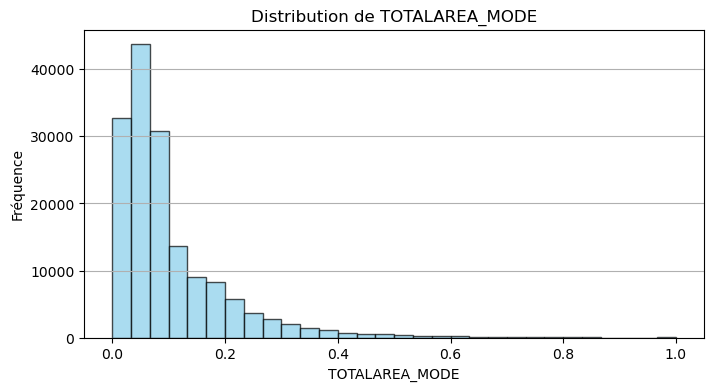

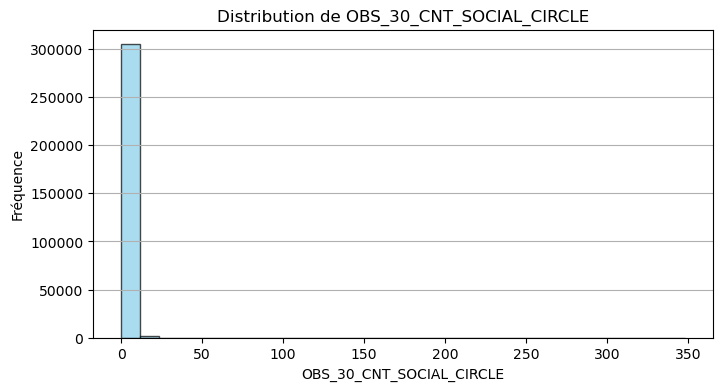

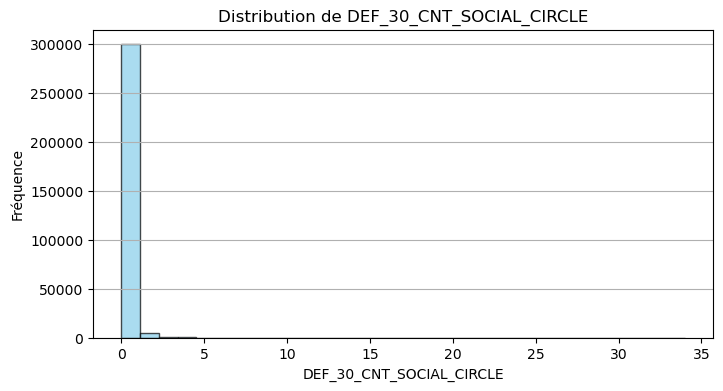

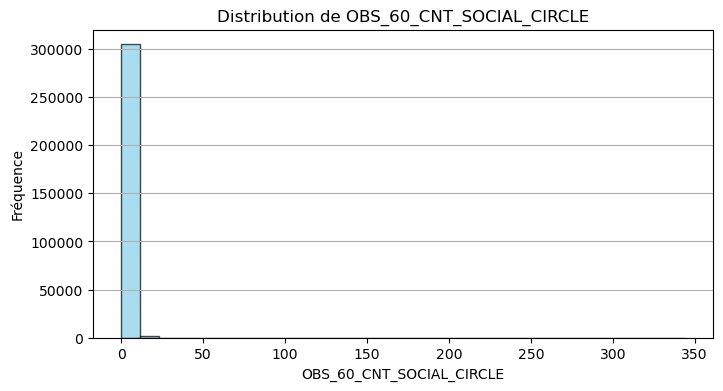

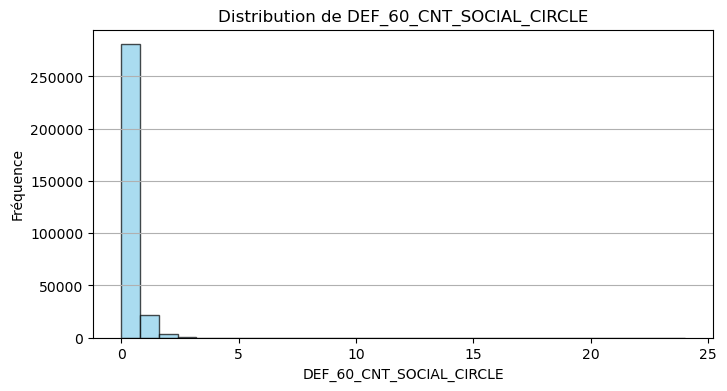

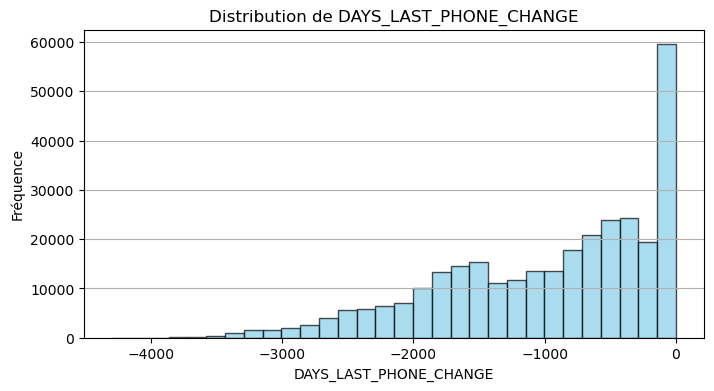

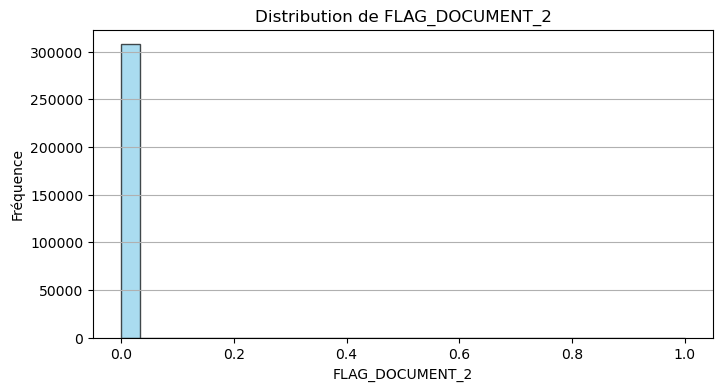

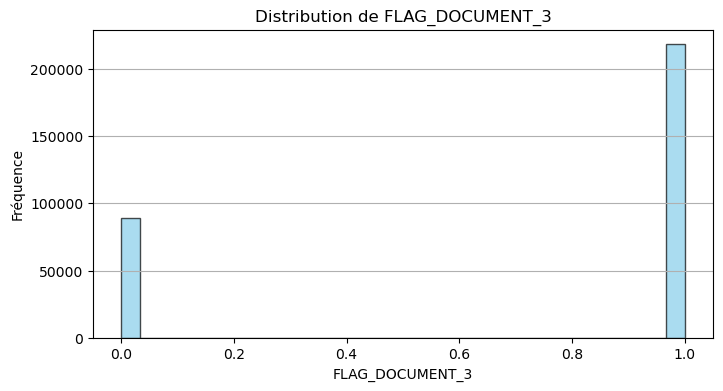

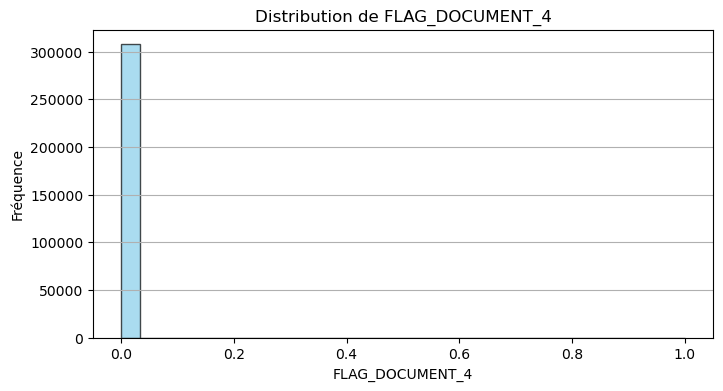

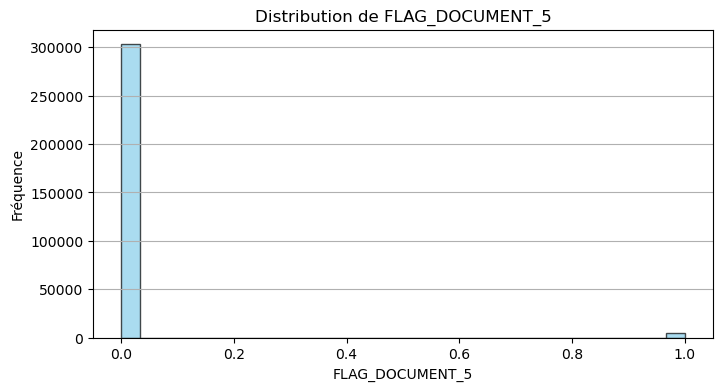

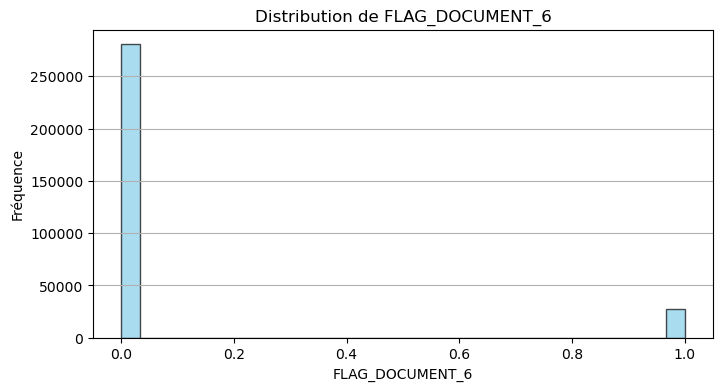

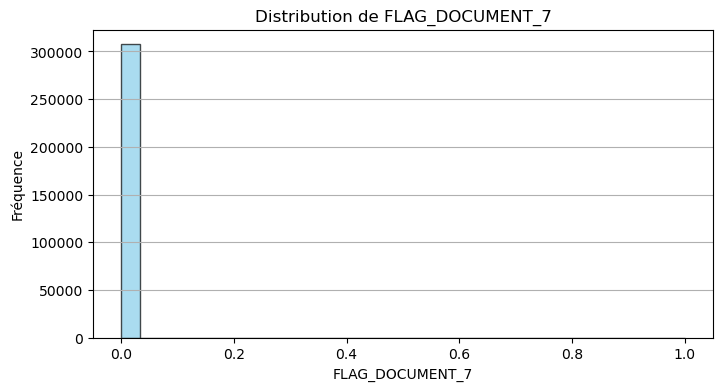

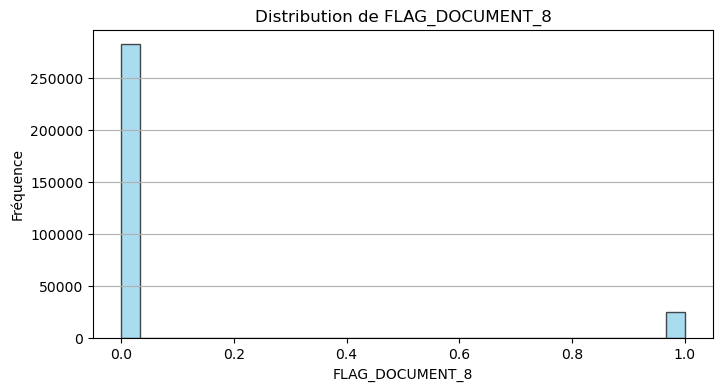

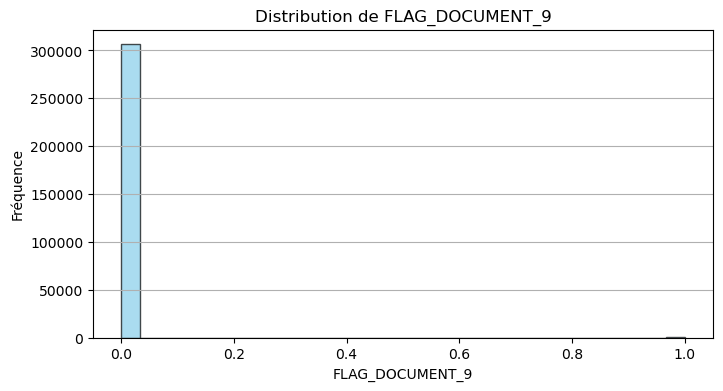

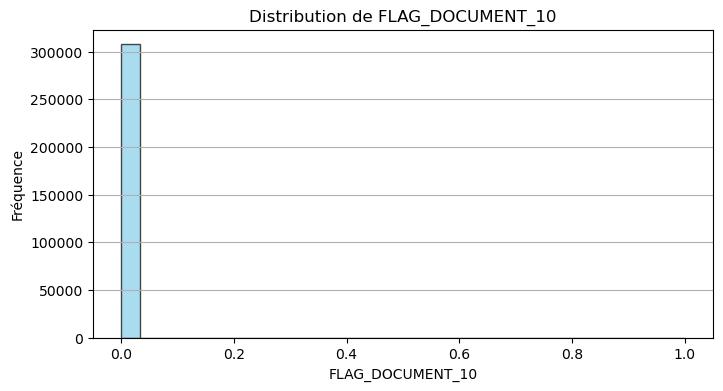

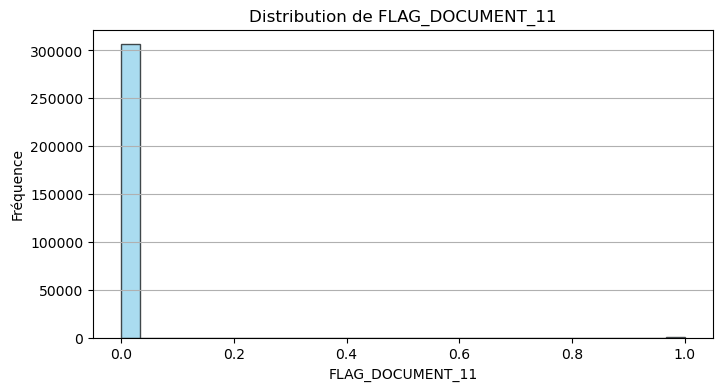

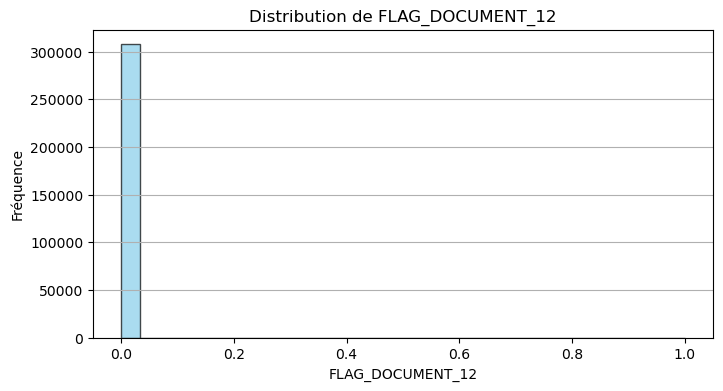

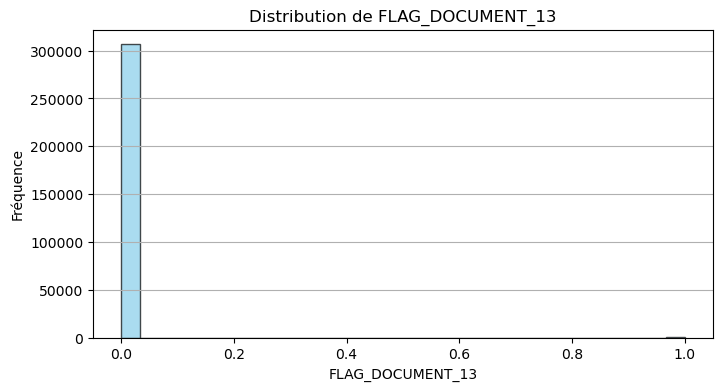

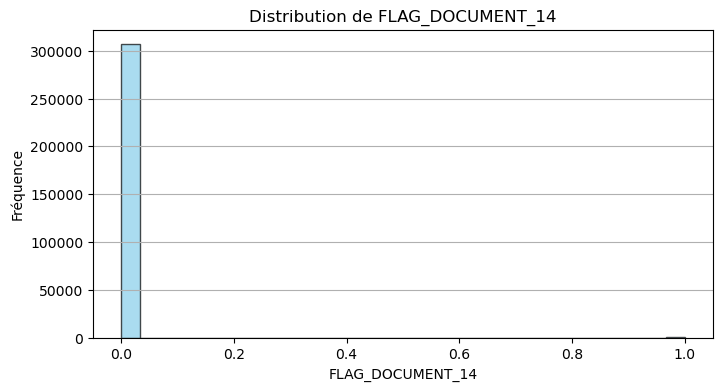

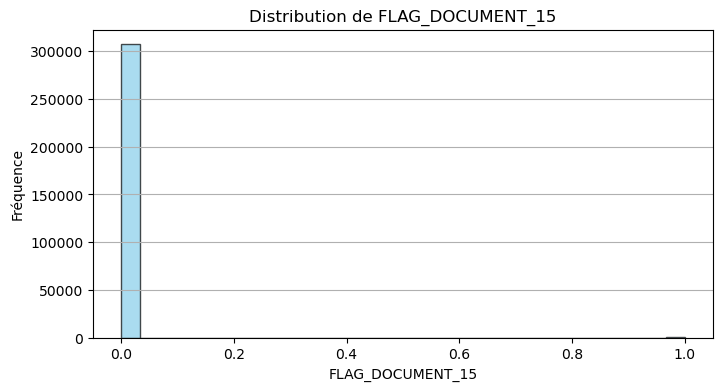

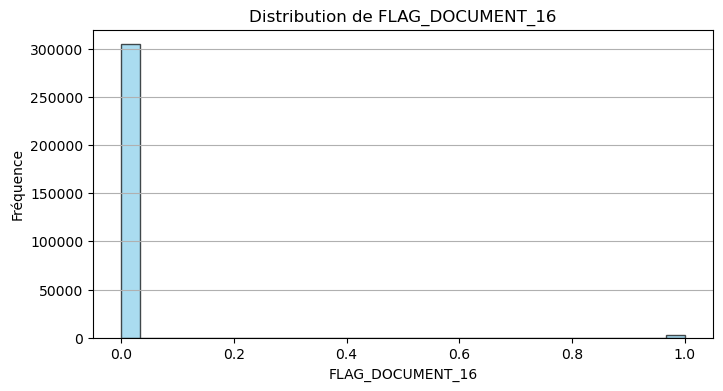

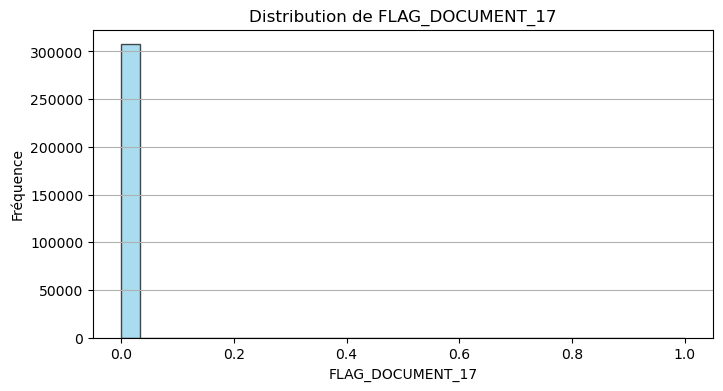

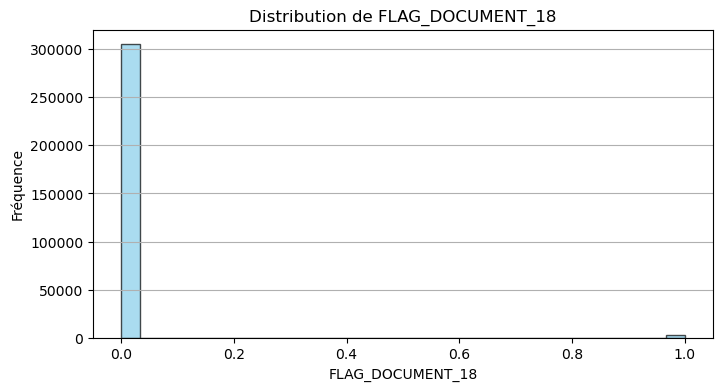

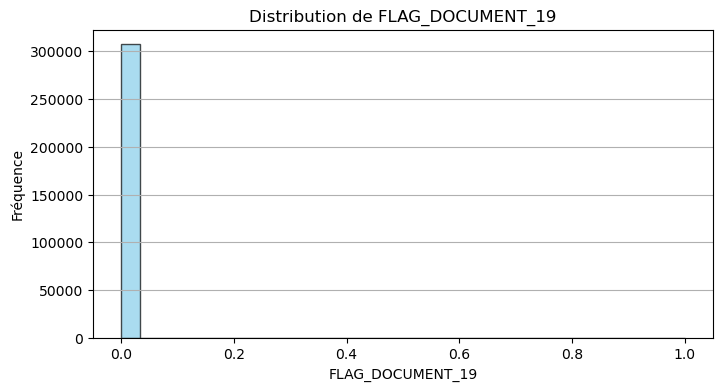

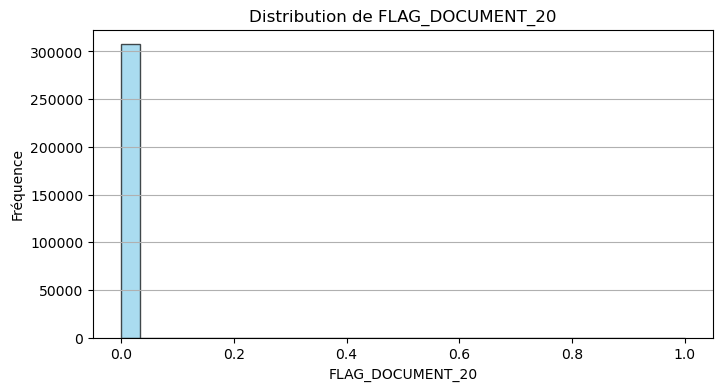

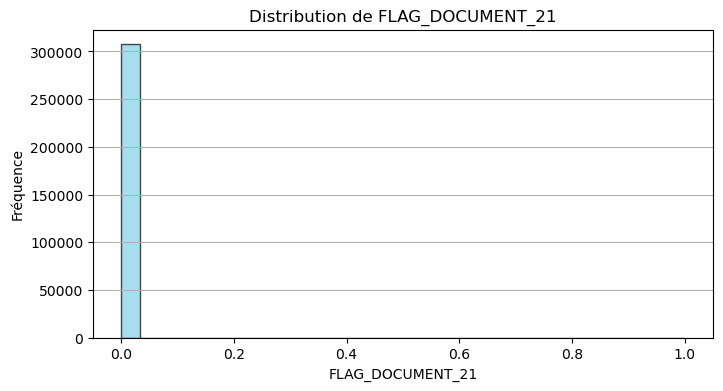

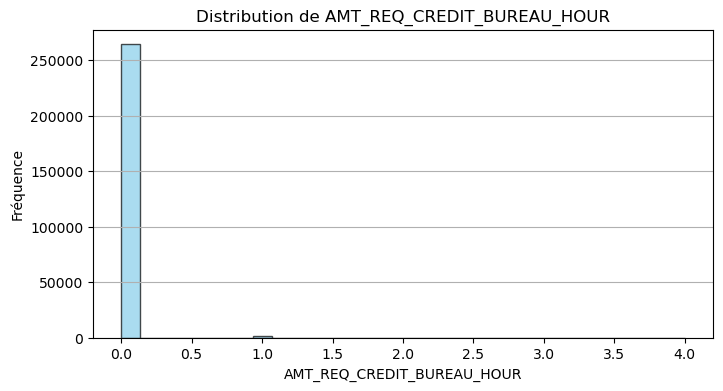

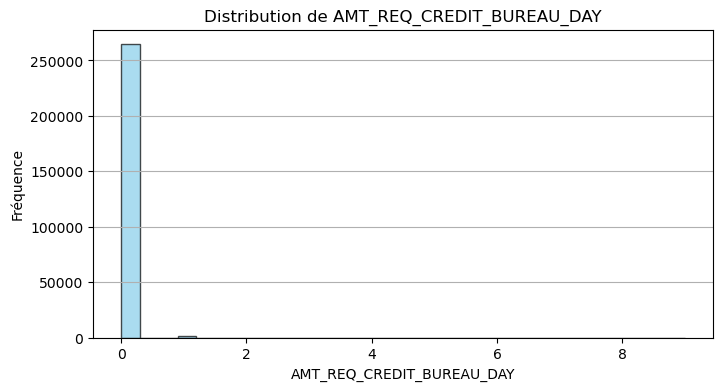

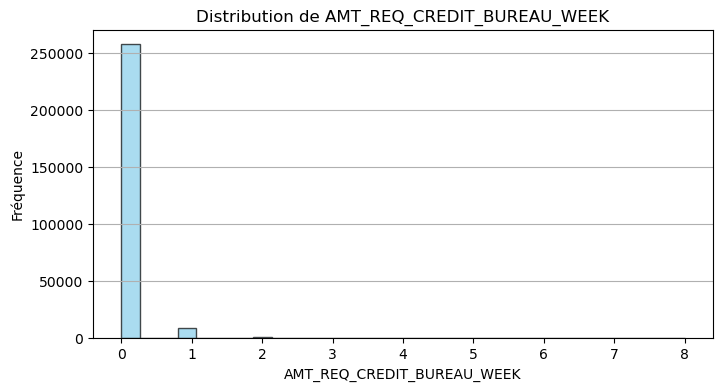

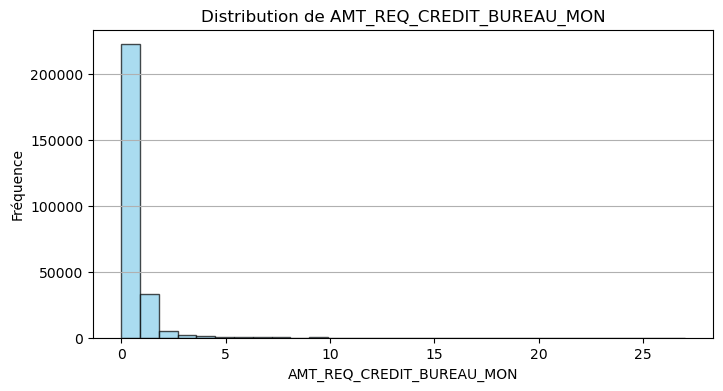

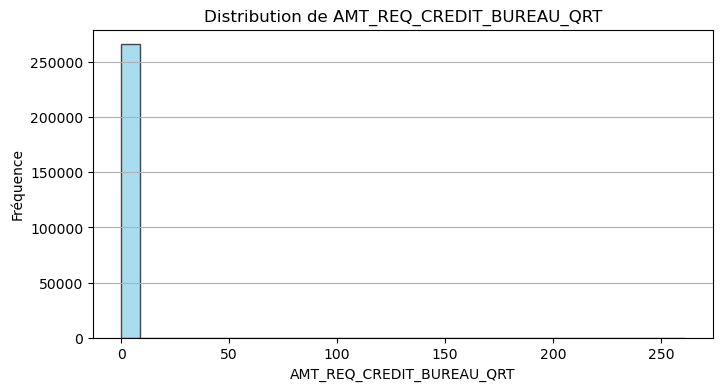

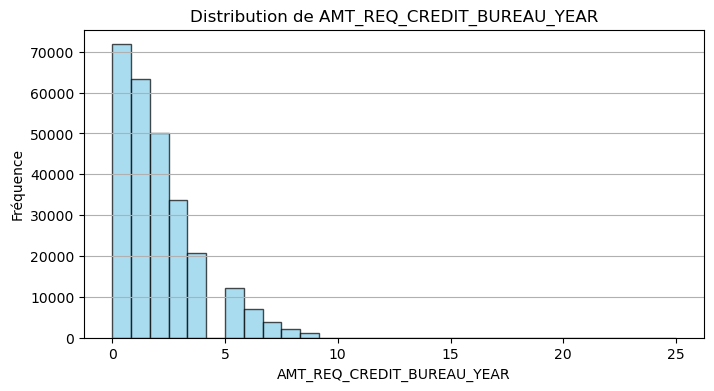

In [77]:


def plot_numeric_variables(data):
    # Sélectionner les colonnes numériques du DataFrame
    numeric_variables = data.select_dtypes(include=['number']).columns.tolist()

    # Boucle pour créer un graphique pour chaque variable numérique
    for var in numeric_variables:
        plt.figure(figsize=(8, 4))

        # Générer un histogramme pour chaque variable numérique
        data[var].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7)

        # Ajouter des titres et des labels
        plt.title(f'Distribution de {var}')
        plt.xlabel(var)
        plt.ylabel('Fréquence')
        plt.grid(axis='y')

        # Afficher le graphique
        plt.show()

# Utilisation de la fonction avec ton jeu de données
plot_numeric_variables(data_train)


**La corrélation des variable avec la variable cible**

In [78]:
# S'assurer que seules les colonnes numériques sont utilisées pour le calcul des corrélations
numeric_data = data_train.select_dtypes(include=[np.number])

# Trouver les corrélations avec la cible ('TARGET') et les trier
correlations = numeric_data.corr()['TARGET'].sort_values()

# Afficher les corrélations
print('Corrélations les plus positives :\n', correlations.tail(10))
print('\nCorrélations les plus négatives :\n', correlations.head(10))



Corrélations les plus positives :
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Corrélations les plus négatives :
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


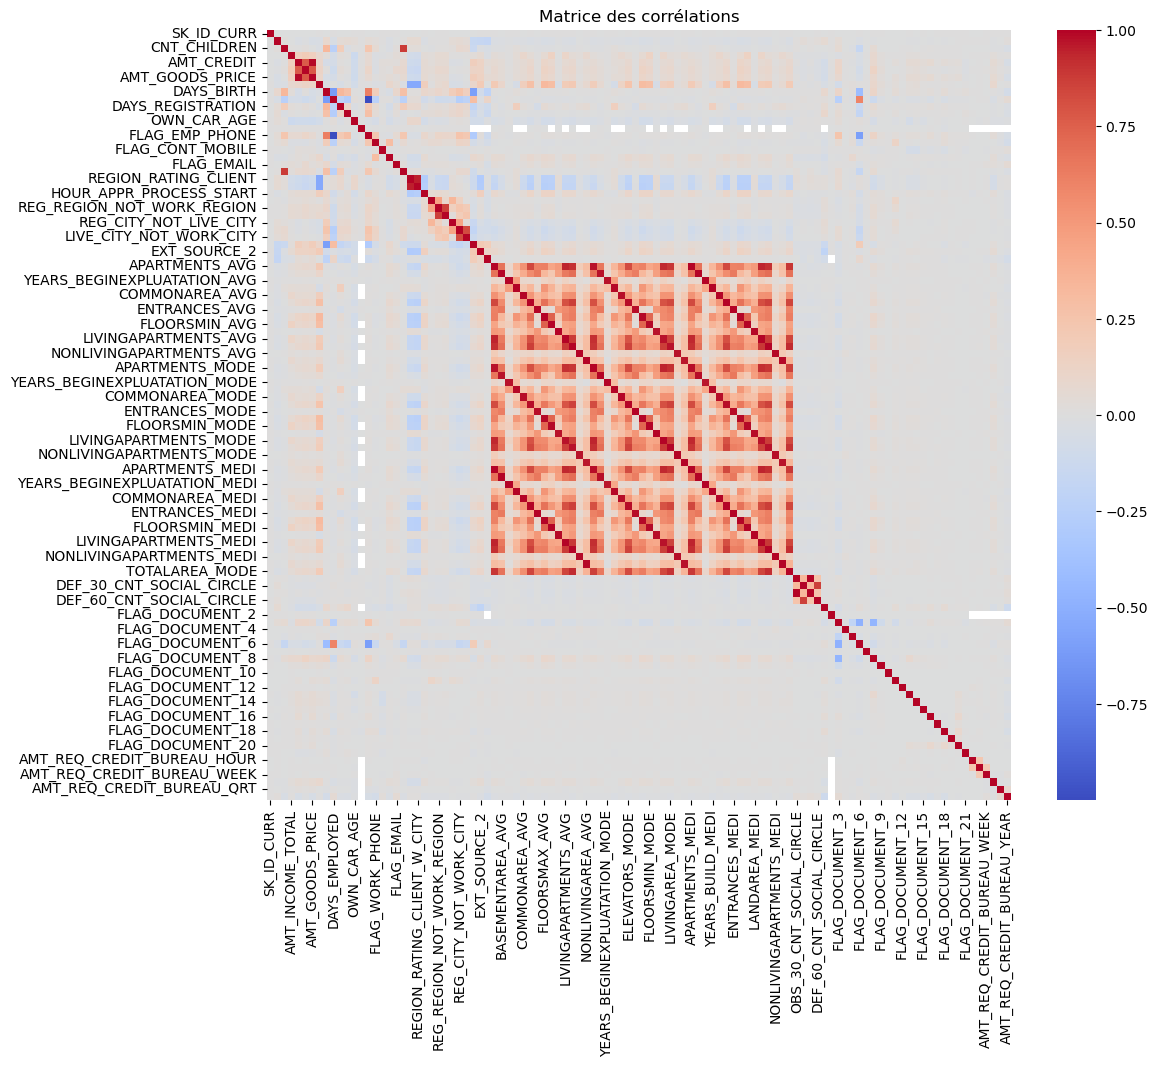

In [79]:
numeric_data = data_train.select_dtypes(include=[np.number])

# Calcul des corrélations
correlation_matrix = numeric_data.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Matrice des corrélations")
plt.show()

In [80]:
# Extraction des colonnes spécifiques
ext_data = data_train[[
    'TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'
]]
ext_data_corrs = ext_data.corr()


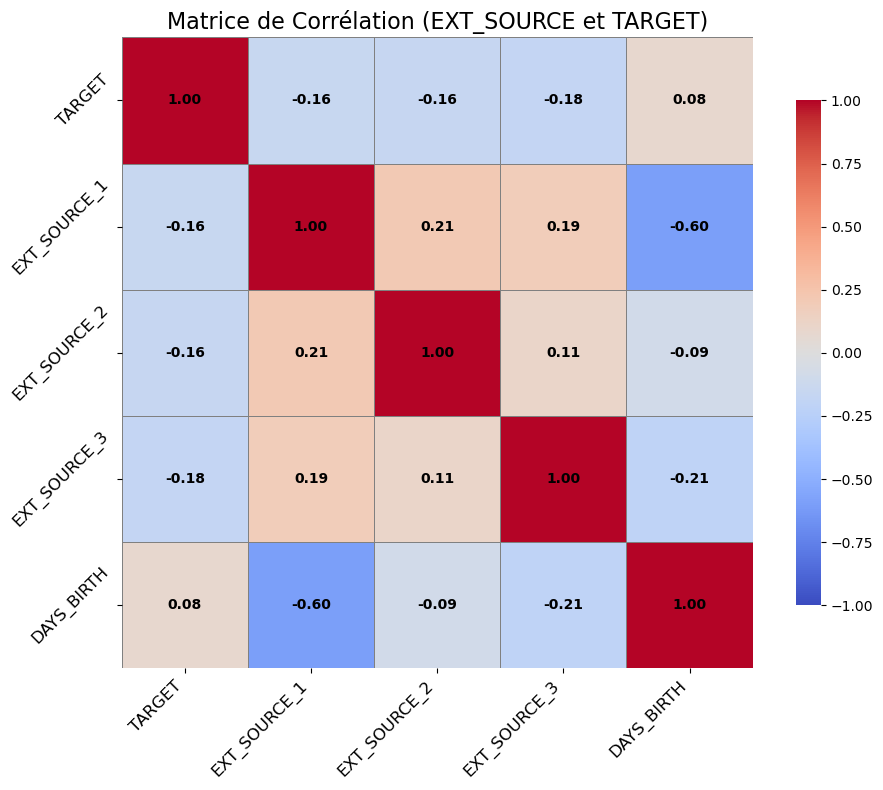

In [81]:

# Créez une figure avec une taille personnalisée
plt.figure(figsize=(10, 8))

# Heatmap des corrélations avec une palette différentes
sns.heatmap(ext_data_corrs,
            cmap='coolwarm',
            annot=True,
            fmt='.2f',
            linewidths=0.5,
            linecolor='gray',
            vmin=-1, vmax=1,
            cbar_kws={'shrink': 0.8},
            square=True,
            annot_kws={"size": 10, "weight": "bold", "color": "black"})

# Ajouter des titres et des labels
plt.title('Matrice de Corrélation (EXT_SOURCE et TARGET)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=45, ha='right', fontsize=12)

# Affichage de la heatmap
plt.tight_layout()
plt.show()
